### **PROJECT TYPE** - **CONTENT BASED RECOMMENDATION SYSTEM**

### **CONTRIBUTION** - **INDIVIDUAL** 

### **NAME** - **SARAVANAN**

---

### **PROJECT SUMMARY** 

This project implements a **content-based recommendation** system that uses metadata from the IMDb Top 1000 movies dataset. By analyzing features such as **genres**, **directors**, **runtime**, **ratings**, and **gross earnings**, the project aims to recommend movies tailored to a **user's preferences**. The primary focus is on understanding patterns and relationships between **movie attributes** through extensive exploratory data analysis (EDA).

----

#### **Introduction**

Recommender systems are an essential tool in today’s digital landscape, helping users navigate vast amounts of content. This project employs a content-based filtering approach, focusing on similarities between items (movies in this case) to provide recommendations. By leveraging rich metadata from the IMDb dataset, we aim to create a personalized and engaging user experience.

----

#### **Context**

The IMDb Top 1000 dataset includes metadata for popular movies, such as:

* Title

* Year of Release

* IMDb Rating

* Genre

* Director and Cast

* MetaScore

* Runtime and Gross Earnings

This project explores these features through data preprocessing, visualization, and machine learning techniques to develop a robust content-based recommendation system.

-----

#### **Content**

**Dataset Overview**

Data Source: IMDb Top 1000 movies CSV file.
Features: 16 columns, including titles, ratings, genres, and votes.
Shape: 1000 rows × 16 columns.

**Preprocessing Steps**

Handling missing values in Certificate, Meta_score, and Gross.
Converting non-numeric fields like Year and Runtime to numeric formats.
Extracting dominant genres for easier categorization.

**Exploratory Data Analysis (EDA)**

Visualized distributions of ratings, genres, runtime, and gross earnings.
Analyzed relationships between features (e.g., IMDb rating vs. votes, runtime vs. gross).

**Recommendation Logic**

Leveraged cosine similarity between vectors of movie attributes for personalized recommendations.

----

#### **Reference** : 

- [Datasource](https://www.kaggle.com/datasets/arthurchongg/imdb-top-1000-movies)

#### **Problem Statement**

The volume of content available in the entertainment industry makes it challenging for users to find movies aligned with their preferences. The objective of this project is to develop a content-based recommendation system that suggests movies by analyzing similarities in their metadata.

----

#### **General Guidelines**

* Input: User preferences, such as favorite genres, actors, or specific movies.

* Output: A ranked list of movie recommendations tailored to user input.
 
* Scalability: Ensure the recommendation engine can adapt to larger datasets or additional features.

----

## **Data Analysis**

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import klib
%matplotlib inline
plt.rcParams['font.family'] = 'SF Pro Display'

In [2]:
directory = r"D:\ML\Recommendation\data"
filename = "imdb_top_1000.csv"

file_path = os.path.join(directory, filename)
print(file_path)

D:\ML\Recommendation\data\imdb_top_1000.csv


In [3]:
raw_data = pd.read_csv(file_path)
raw_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### ***Nature of the Dataset***

In [4]:
print("Shape of dataset :",raw_data.shape)
print('--'*60)
print("Null-values :\n", raw_data.isna().sum())
print('--'*60)
print("Data Info :\n", raw_data.info())
print('--'*60)

Shape of dataset : (1000, 16)
------------------------------------------------------------------------------------------------------------------------
Null-values :
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    ob

In [5]:
print("Features : ", raw_data.columns)
print('--'*60)
print("Datatypes :\n", raw_data.dtypes)

Features :  Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
Datatypes :
 Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [6]:
raw_data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
datas = {
    'Year' : raw_data['Released_Year'],
    'Title' : raw_data['Series_Title'] ,
    'IMDB' : raw_data['IMDB_Rating'],
    'Meta' : raw_data['Meta_score'],
    'Votes' : raw_data['No_of_Votes'],
    'Genre' : raw_data['Genre'], 
    'Runtime' : raw_data['Runtime'], 
    'Gross' : raw_data['Gross'],
    'Director' : raw_data['Director'],
    'MainCast' : raw_data["Star1"], 
    'Supportactor' : raw_data['Star2']
    }

df = pd.DataFrame(data = datas)

In [8]:
df.head()

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor
0,1994,The Shawshank Redemption,9.3,80.0,2343110,Drama,142 min,"28,341,469",Frank Darabont,Tim Robbins,Morgan Freeman
1,1972,The Godfather,9.2,100.0,1620367,"Crime, Drama",175 min,"134,966,411",Francis Ford Coppola,Marlon Brando,Al Pacino
2,2008,The Dark Knight,9.0,84.0,2303232,"Action, Crime, Drama",152 min,"534,858,444",Christopher Nolan,Christian Bale,Heath Ledger
3,1974,The Godfather: Part II,9.0,90.0,1129952,"Crime, Drama",202 min,"57,300,000",Francis Ford Coppola,Al Pacino,Robert De Niro
4,1957,12 Angry Men,9.0,96.0,689845,"Crime, Drama",96 min,"4,360,000",Sidney Lumet,Henry Fonda,Lee J. Cobb


In [9]:
print("No of Unique values :\n",df.nunique())
print('---'*30)
print("Null-values :\n",df.isna().sum()) 
print('---'*30)
print("Shape of Data :", df.shape)
print('---'*30)

No of Unique values :
 Year            100
Title           999
IMDB             17
Meta             63
Votes           999
Genre           202
Runtime         140
Gross           823
Director        548
MainCast        660
Supportactor    841
dtype: int64
------------------------------------------------------------------------------------------
Null-values :
 Year              0
Title             0
IMDB              0
Meta            157
Votes             0
Genre             0
Runtime           0
Gross           169
Director          0
MainCast          0
Supportactor      0
dtype: int64
------------------------------------------------------------------------------------------
Shape of Data : (1000, 11)
------------------------------------------------------------------------------------------


In [10]:
print("Datatypes :\n", df.dtypes)
print('---'*30)
print("Features :", df.columns)

Datatypes :
 Year             object
Title            object
IMDB            float64
Meta            float64
Votes             int64
Genre            object
Runtime          object
Gross            object
Director         object
MainCast         object
Supportactor     object
dtype: object
------------------------------------------------------------------------------------------
Features : Index(['Year', 'Title', 'IMDB', 'Meta', 'Votes', 'Genre', 'Runtime', 'Gross',
       'Director', 'MainCast', 'Supportactor'],
      dtype='object')


---

> ### ***1. Data Preprocessing*** 

##### ***YEAR***

In [11]:
df['Year'].isna().sum()

np.int64(0)

In [12]:
# IMDB Ratings by decades

# df[(df['Year']>=1960)&(df['Year']<1970) & (df['IMDB']>=9)]

*df[(df['Year']>=1960)&(df['Year']<1970) & (df['IMDB']>=9)] for this line of code, our machine detected an error saying >= is not supported for string character, meaning there's an imposter in the "Year" series, let's solve this. At line 966 Film Apollo's Year has mentioned, instead PG which is a string object is declared, let's fix it, thanks to ***"raise"*** function*

In [13]:
#df['Year'] = pd.to_numeric(df['Year'], errors='raise')

*ValueError: Unable to parse string "PG" at position 966. This snippet helped us identify the anomaly*

In [14]:
# Preview of the film before
#df.iloc[966:967]

In [15]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [16]:
# Preview of the film after correcting it
#df.iloc[966:967]

***The Year column had non-numeric anomalies ('PG' for Apollo 13). Missing or invalid values were manually imputed with 1995 after a search on Google for the correct release year. This ensures the dataset's completeness for further analysis.***

In [17]:
df['Year'] = df['Year'].fillna(1995)

In [18]:
df['Year'] = df['Year'].astype(int)

In [19]:
minimum_year = df['Year'].min()
mean_year = df['Year'].mean()
median_year  = df['Year'].median()
percentiles = np.percentile(df['Year'], [25, 75])
max_year = df['Year'].max()

print("Starting year :", minimum_year)
print("Median :",median_year)
print("Mean :",np.round(mean_year, 0))
print("Percentiles of Year :",percentiles)
print("Final year :",max_year)

Starting year : 1920
Median : 1999.0
Mean : 1991.0
Percentiles of Year : [1976. 2009.]
Final year : 2020


---

##### ***META***

In [20]:
minimum_metascore = df['Meta'].min()
median_metascore  = df['Meta'].median()
mean_metascore = df['Meta'].mean()
percentiles = np.percentile(df['Meta'], [25, 75])
max_metascore = df['Meta'].max()

print("Minimum MetaScore :", minimum_metascore)
print("Mean MetaScore:",np.round(mean_metascore,0))
print("Median MetaScore:",median_metascore)
print("Percentiles of MetaScore :",percentiles)
print("Maximum MetaScore :",max_metascore)

Minimum MetaScore : 28.0
Mean MetaScore: 78.0
Median MetaScore: 79.0
Percentiles of MetaScore : [nan nan]
Maximum MetaScore : 100.0


***The percentiles return NaN, indicating the presence of null values in the data.***

Text(0.5, 1.0, 'Distribution of Meta score with Mean and Median')

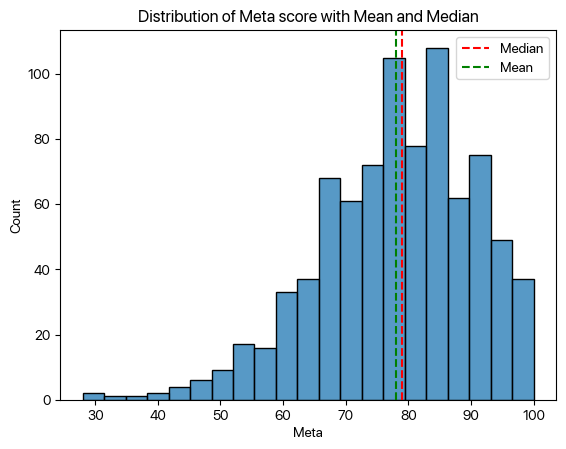

In [21]:
fig, ax = plt.subplots()  # Create a figure and axis
sns.histplot(df['Meta'], ax=ax)  # Plot histogram on the specified ax
ax.axvline(median_metascore, color='red', linestyle='--', label='Median')  # Add a vertical line at the median
ax.axvline(mean_metascore, color = 'green', linestyle='--', label='Mean')

ax.legend()
ax.set_title('Distribution of Meta score with Mean and Median')

In [22]:
df['Meta'] = df['Meta'].fillna(mean_metascore)

In [23]:
df['Meta'] = df['Meta'].astype(int)

##### ***RUNTIME***

In [24]:
Runtime = []
for x in df['Runtime']:
    runtime = re.compile('\d+')
    runtime = runtime.findall(x)
    if len(runtime)==2:
        Runtime.append(int(runtime[1])-int(runtime[0])+1)
    else:
        Runtime.append(int(runtime[0])+1)

df['Runtime'] = Runtime

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Neodas\AppData\Local\Temp\ipykernel_5612\2046908767.py:3: SyntaxWarning: invalid escape sequence '\d'
  runtime = re.compile('\d+')


##### ***GENRE***

In [25]:
def assign_main_genre(row):
    genres = row['Genre'].split(', ')  
    return genres[0]

df['Dominant_Genre'] = df.apply(assign_main_genre, axis=1)

***The first genre listed in a movie's genre column is considered "dominant." While this simplifies multi-genre films, it may lead to oversights in movies where secondary genres are more influential.***

##### ***GROSS***

In [26]:
df = df.dropna(subset=['Gross'])

In [27]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('int')

---

***Calculating the mean, median and percentiles for the further analysis***

In [28]:
minimum_votes = df['Votes'].min()
median_votes  = df['Votes'].median()
mean_votes = df['Votes'].mean()
percentiles = np.percentile(df['Votes'], [25, 75])
max_votes = df['Votes'].max()

print("Minimum Votes :", minimum_votes)
print("Mean Votes:", np.round(mean_votes))
print("Median Votes:",np.round(median_votes))
print("Percentiles of Votes :",percentiles)
print("Maximum Votes :",max_votes)

Minimum Votes : 25088
Mean Votes: 315250.0
Median Votes: 186734.0
Percentiles of Votes : [ 71430. 445721.]
Maximum Votes : 2343110


In [29]:
minimum_runtime = df['Runtime'].min()
median_runtime  = df['Runtime'].median()
mean_runtime = df['Runtime'].mean()
percentiles = np.percentile(df['Runtime'], [25, 75])
max_runtime = df['Runtime'].max()

print("Minimum Runtime :", minimum_runtime)
print("Mean Runtime:", np.round(mean_runtime))
print("Median Runtime:",median_runtime)
print("Percentiles of Runtime :",percentiles)
print("Maximum Runtime :",max_runtime)

Minimum Runtime : 46
Mean Runtime: 125.0
Median Runtime: 121.0
Percentiles of Runtime : [105. 139.]
Maximum Runtime : 243


In [30]:
minimum_imdb = df['IMDB'].min()
median_imdb  = df['IMDB'].median()
mean_imdb = df['IMDB'].mean()
percentiles = np.percentile(df['IMDB'], [25, 75])
max_imdb = df['IMDB'].max()

print("Minimum IMDB :", minimum_imdb)
print("Mean IMDB:", np.round(mean_imdb))
print("Median IMDB:",median_imdb)
print("Percentiles of IMDB :",percentiles)
print("Maximum IMDB :",max_imdb)

Minimum IMDB : 7.6
Mean IMDB: 8.0
Median IMDB: 7.9
Percentiles of IMDB : [7.7 8.1]
Maximum IMDB : 9.3


In [31]:
minimum_gross = df['Gross'].min()
median_gross  = df['Gross'].median()
mean_gross = df['Gross'].mean()
percentiles = np.percentile(df['Gross'], [25, 75])
max_gross = df['Gross'].max()

print("Minimum Gross :", minimum_gross)
print("Mean Gross:", np.round(mean_gross))
print("Median Gross:",median_gross)
print("Percentiles of Gross :",percentiles)
print("Maximum Gross :",max_gross)

Minimum Gross : 1305
Mean Gross: 68034751.0
Median Gross: 23530892.0
Percentiles of Gross : [ 3253559.  80750893.5]
Maximum Gross : 936662225


---

> ### ***2. Data Visualization, Storytelling & Experimenting with Charts : Understanding the relationships between features*** 

##### ***Analyzing Trends and Relationships within the Data***

***Movie Counts of each Decades starting from 1920-2020***

In [32]:
#print('Before 1930 :\n'), print(df[df['Year']<=1930].count())
#print('---'*30)
#print('From 1930 -1940 :\n'),print(df[(df['Year']>=1930)&(df['Year']<1940)].count())
#print('---'*30)
#print('From 1940 -1950 :\n'),print(df[(df['Year']>=1940)&(df['Year']<1950)].count())
#print('---'*30)
#print('From 1950 -1960 :\n'),print(df[(df['Year']>=1950)&(df['Year']<1960)].count())
#print('---'*30)
#print('From 1960 -1970 :\n'),print(df[(df['Year']>=1960)&(df['Year']<1970)].count())
#print('---'*30)
#print('From 1970 -1980 :\n'),print(df[(df['Year']>=1970)&(df['Year']<1980)].count())
#print('---'*30)
#print('From 1980 -1990 :\n'),print(df[(df['Year']>=1980)&(df['Year']<1990)].count())
#print('---'*30)
#print('From 1990 -2000 :\n'),print(df[(df['Year']>=1990)&(df['Year']<2000)].count())
#print('---'*30)
#print('From 2000 -2010 :\n'),print(df[(df['Year']>=2000)&(df['Year']<2010)].count())
#print('---'*30)
#print('From 2010 -2020 :\n'),print(df[(df['Year']>=2010)&(df['Year']<=2020)].count())
#print('---'*30)

*"**From this, we know the counts of movies released over the decades**."*

***Title only has Movie names, just uninfluential, in our case***

In [33]:
sns.set_context('paper')
sns.set_style('ticks')

*Available palettes : Blues,BrBG, BuGn, BuPu, coolwarm, GnBu, Greens, Greys, Oranges, OrRd, PRGn,Paired, PiYG, Purples, RdBu, RdGy, RdPu, RdYlBu, RdYlGn, Spectral, YlGn, YlGnBu, YlOrBr, YlOrRd*

##### ***Year wise distribution***

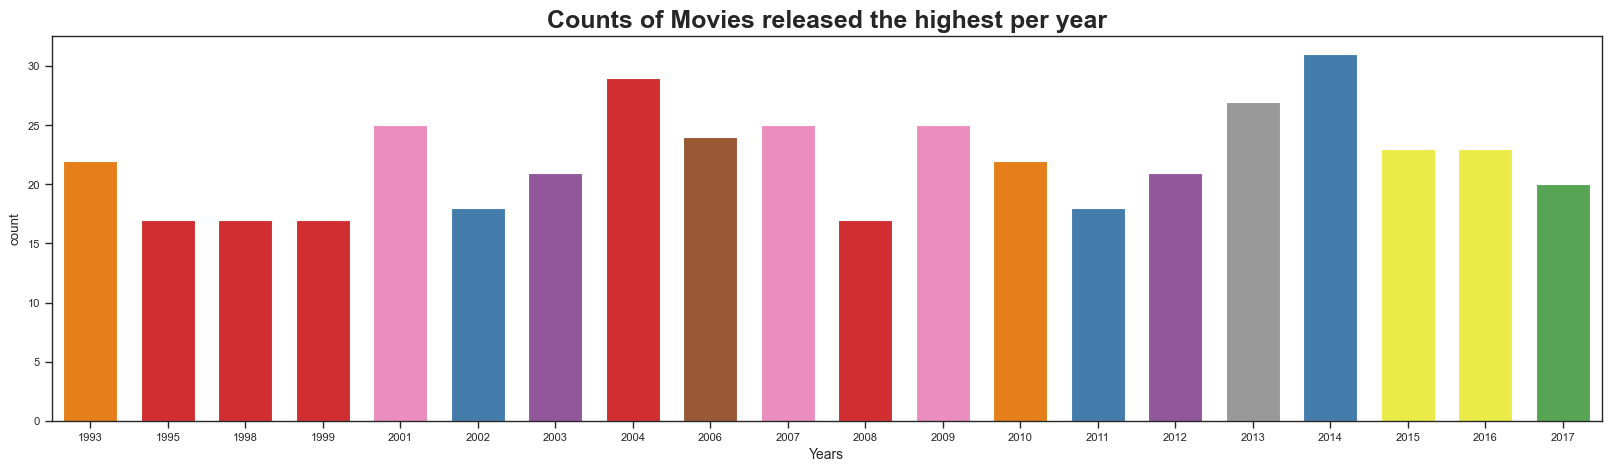

In [34]:
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=df['Year'].value_counts()[:20].index, y=df['Year'].value_counts()[:20], palette='Set1', hue=df['Year'].value_counts()[:20], legend=False, width=0.7, saturation=.80)

g.set_title("Counts of Movies released the highest per year", weight="bold", fontsize=18)
g.set_xlabel("Years", fontsize=10)

g.tick_params(axis='x', labelsize= 8)  
g.tick_params(axis='y', labelsize= 8)  

plt.show()


***This chart conveys in which year the movies have released more***

-----

##### ***IMDB Distribution***

In [35]:
df['IMDB'].value_counts().count()

np.int64(17)

In [36]:
top_imdb = df[(df['IMDB']>8.5)]

#Preview of Top 20 IMDB movies over the years
#top_imdb[:20]

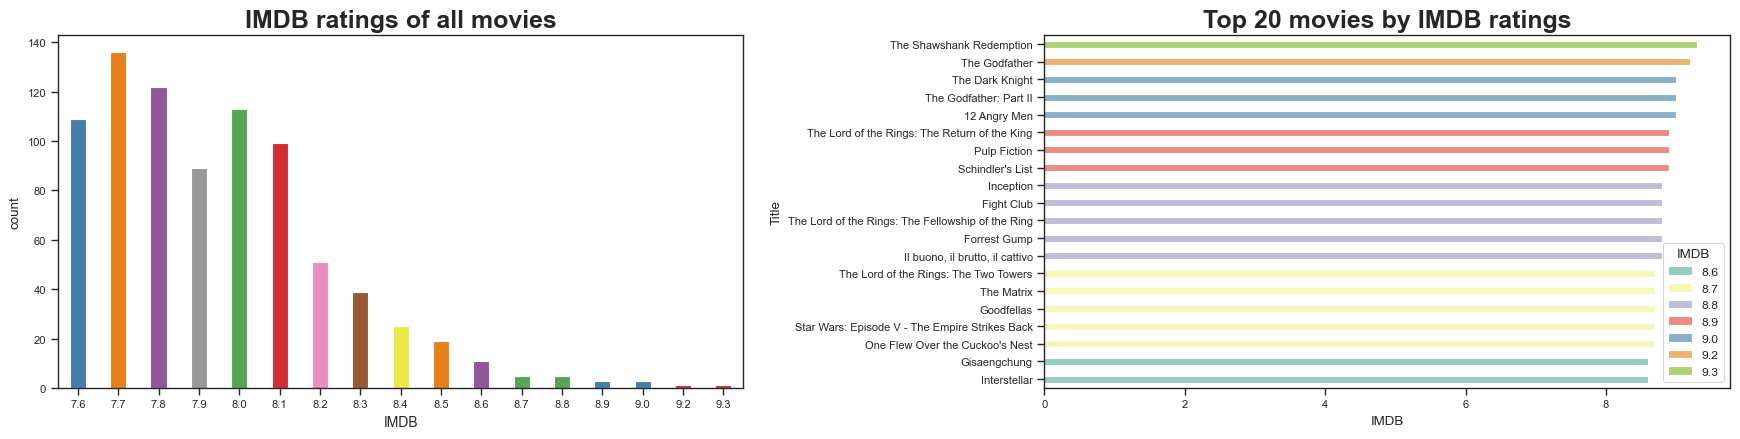

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  # Corrected to plt.subplots

sns.barplot(x=df['IMDB'].value_counts().index, y=df['IMDB'].value_counts(), palette='Set1', hue=df['IMDB'].value_counts(),legend=False, width=0.4, saturation=0.8, ax=axs[0])
axs[0].set_title("IMDB ratings of all movies", weight="bold", fontsize=18)
axs[0].set_xlabel("IMDB", fontsize=10)
axs[0].tick_params(axis='x', labelsize=8)
axs[0].tick_params(axis='y', labelsize=8)

sns.barplot(x=top_imdb['IMDB'], y=top_imdb['Title'][:20], palette='Set3', hue=top_imdb['IMDB'], width=0.4, saturation=0.8, ax=axs[1])
axs[1].set_title("Top 20 movies by IMDB ratings", weight="bold", fontsize=18)
axs[1].tick_params(axis='x', labelsize=8)
axs[1].tick_params(axis='y', labelsize=8)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


***This plots shows us the counts of IMDB & top 20 IMDB movies***

***Now let's go by decade wise***

In [38]:
vintage_hits = df[(df['Year']>=1920)&(df['Year']<1970)&(df['IMDB']>8.5)]
vintage_hits

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre
4,1957,12 Angry Men,9.0,96,689845,"Crime, Drama",97,4360000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Crime
12,1966,"Il buono, il brutto, il cattivo",8.8,90,688390,Western,162,6100000,Sergio Leone,Clint Eastwood,Eli Wallach,Western
31,1954,Shichinin no samurai,8.6,98,315744,"Action, Adventure, Drama",208,269061,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Action


In [39]:
retro_hits = df[(df['Year']>=1970)&(df['Year']<1990)&(df['IMDB']>8.5)]
retro_hits

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre
1,1972,The Godfather,9.2,100,1620367,"Crime, Drama",176,134966411,Francis Ford Coppola,Marlon Brando,Al Pacino,Crime
3,1974,The Godfather: Part II,9.0,90,1129952,"Crime, Drama",203,57300000,Francis Ford Coppola,Al Pacino,Robert De Niro,Crime
16,1980,Star Wars: Episode V - The Empire Strikes Back,8.7,82,1159315,"Action, Adventure, Fantasy",125,290475067,Irvin Kershner,Mark Hamill,Harrison Ford,Action
17,1975,One Flew Over the Cuckoo's Nest,8.7,83,918088,Drama,134,112000000,Milos Forman,Jack Nicholson,Louise Fletcher,Drama
29,1977,Star Wars,8.6,90,1231473,"Action, Adventure, Fantasy",122,322740140,George Lucas,Mark Hamill,Harrison Ford,Action


In [40]:
millennium_hits = df[(df['Year']>=1990)&(df['Year']<2000)&(df['IMDB']>8.5)]
millennium_hits[:5]

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre
0,1994,The Shawshank Redemption,9.3,80,2343110,Drama,143,28341469,Frank Darabont,Tim Robbins,Morgan Freeman,Drama
6,1994,Pulp Fiction,8.9,94,1826188,"Crime, Drama",155,107928762,Quentin Tarantino,John Travolta,Uma Thurman,Crime
7,1993,Schindler's List,8.9,94,1213505,"Biography, Drama, History",196,96898818,Steven Spielberg,Liam Neeson,Ralph Fiennes,Biography
9,1999,Fight Club,8.8,66,1854740,Drama,140,37030102,David Fincher,Brad Pitt,Edward Norton,Drama
11,1994,Forrest Gump,8.8,82,1809221,"Drama, Romance",143,330252182,Robert Zemeckis,Tom Hanks,Robin Wright,Drama


In [41]:
modern_hits =df[(df['Year']>=2000)&(df['Year']<=2020)&(df['IMDB']>8.5)]
modern_hits[:5]

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre
2,2008,The Dark Knight,9.0,84,2303232,"Action, Crime, Drama",153,534858444,Christopher Nolan,Christian Bale,Heath Ledger,Action
5,2003,The Lord of the Rings: The Return of the King,8.9,94,1642758,"Action, Adventure, Drama",202,377845905,Peter Jackson,Elijah Wood,Viggo Mortensen,Action
8,2010,Inception,8.8,74,2067042,"Action, Adventure, Sci-Fi",149,292576195,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Action
10,2001,The Lord of the Rings: The Fellowship of the Ring,8.8,92,1661481,"Action, Adventure, Drama",179,315544750,Peter Jackson,Elijah Wood,Ian McKellen,Action
13,2002,The Lord of the Rings: The Two Towers,8.7,87,1485555,"Action, Adventure, Drama",180,342551365,Peter Jackson,Elijah Wood,Ian McKellen,Action


***Top IMDB movies of all decades***

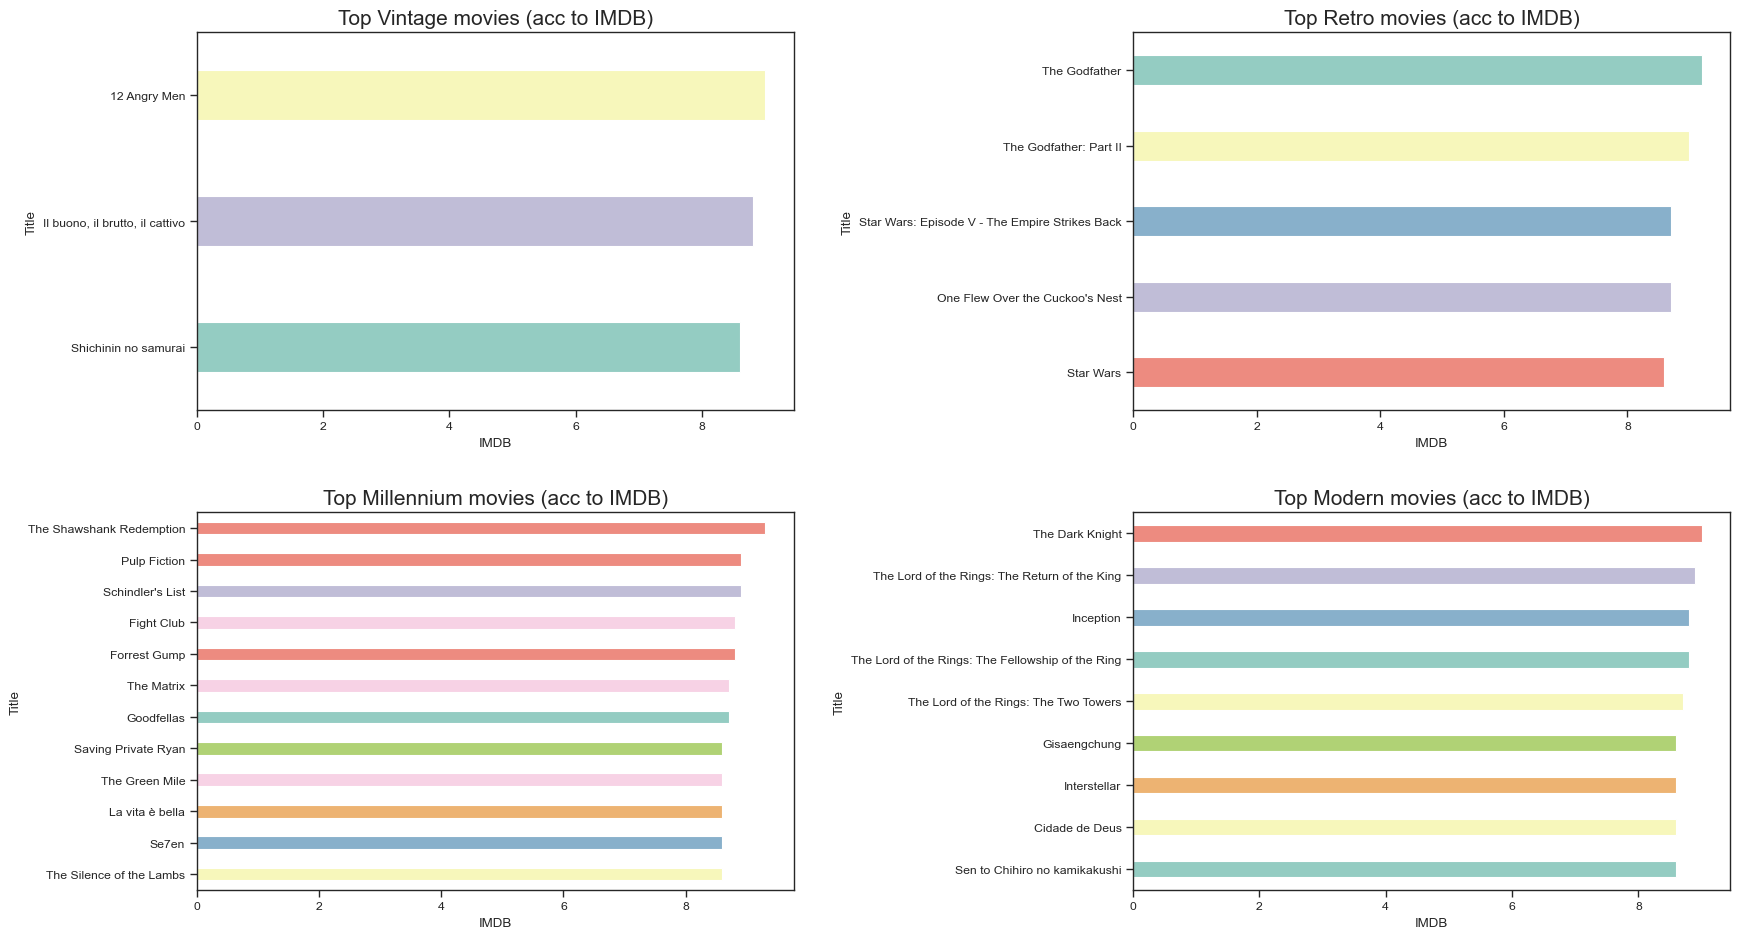

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['IMDB'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Top Vintage movies (acc to IMDB)', fontsize=15)

sns.barplot(x=retro_hits['IMDB'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Top Retro movies (acc to IMDB)', fontsize=15)

sns.barplot(x=millennium_hits['IMDB'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Top Millennium movies (acc to IMDB)', fontsize=15)

sns.barplot(x=modern_hits['IMDB'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Top Modern movies (acc to IMDB)', fontsize=15)

plt.tight_layout(pad=3, h_pad=3, w_pad=3)
plt.show()


***This plots show the top IMDB movies over the decades*** 

----

##### ***Meta Score*** 

In [43]:
df['Meta'].value_counts().count()

np.int64(63)

In [44]:
top_meta = df[df['Meta']==100]

#Preview of top 10 movies with high meta-score
#top_meta

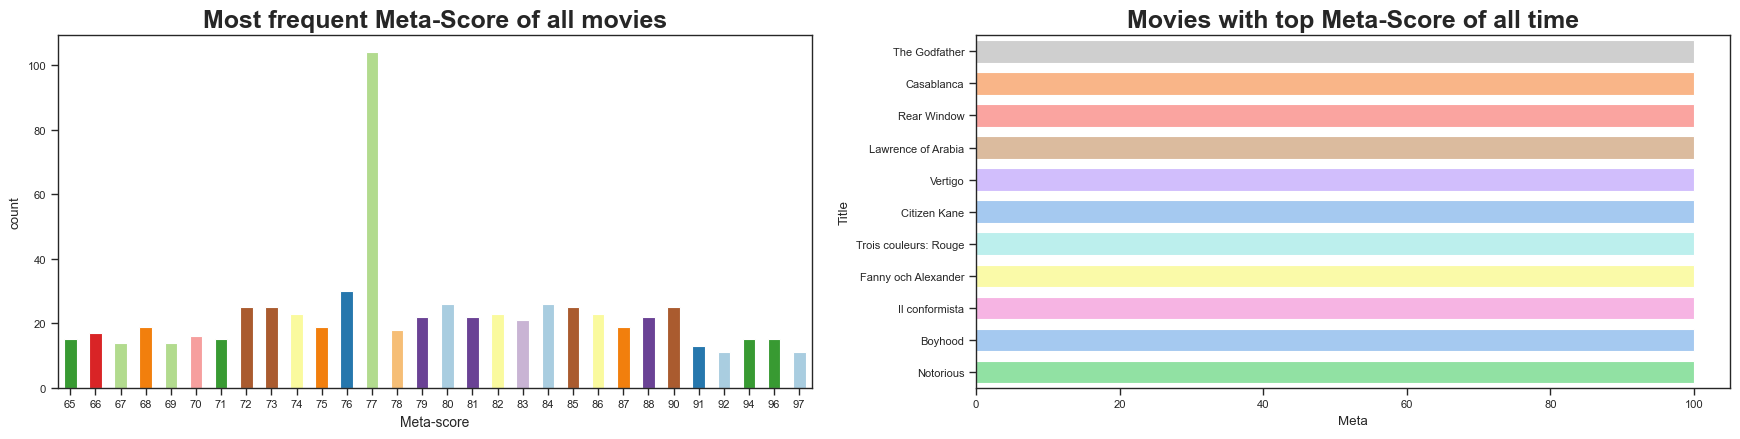

In [45]:
fig, axs = plt.subplots(1,2, figsize = (18, 5))
sns.barplot(x=df['Meta'].value_counts()[:30].index, y=df['Meta'].value_counts()[:30], palette='Paired', hue=df['Meta'].value_counts()[:30], legend=False, width=0.5, saturation=.90, ax = axs[0])
axs[0].set_title("Most frequent Meta-Score of all movies", weight="bold", fontsize=18)
axs[0].set_xlabel("Meta-score", fontsize=10)
axs[0].tick_params(axis='x', labelsize=8)
axs[0].tick_params(axis='y', labelsize=8)

sns.barplot(x=top_meta['Meta'], y=top_meta['Title'], hue=top_meta['Year'], palette='pastel', legend=False, width=0.7, saturation=.90, ax=axs[1])
axs[1].set_title("Movies with top Meta-Score of all time", weight="bold", fontsize=18)
axs[1].tick_params(axis='x', labelsize=8)
axs[1].tick_params(axis='y', labelsize=8)

plt.tight_layout(pad = 3, h_pad=2, w_pad=2)
plt.show()

***Movies with high meta score and their IMDB***

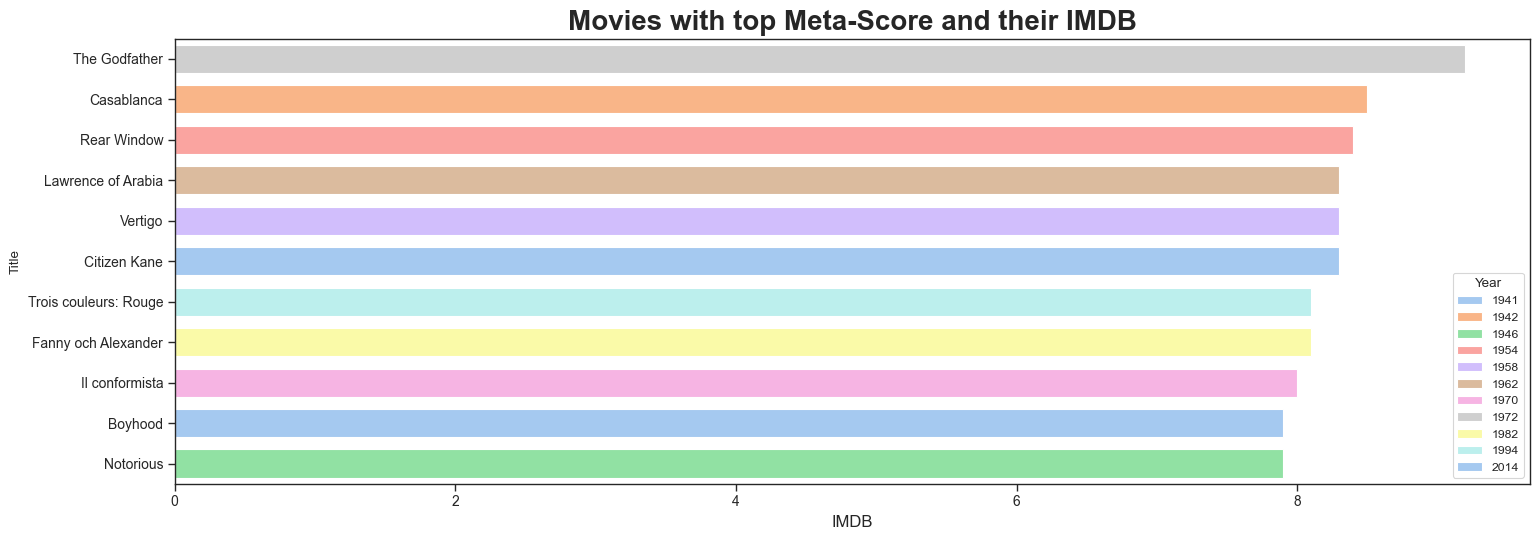

In [46]:
fig, axs = plt.subplots(figsize=(16, 6))
g = sns.barplot(x=top_meta['IMDB'], y=top_meta['Title'], hue=top_meta['Year'], palette='pastel', legend=True, width=0.7, saturation=.90)

g.set_title("Movies with top Meta-Score and their IMDB", weight="bold", fontsize=20)
g.set_xlabel("IMDB", fontsize=12)

g.tick_params(axis='x', labelsize= 10)  
g.tick_params(axis='y', labelsize= 10)  

plt.tight_layout(pad = 3, h_pad=2, w_pad=2)
plt.show()

***Movies of all decades and their meta scores***

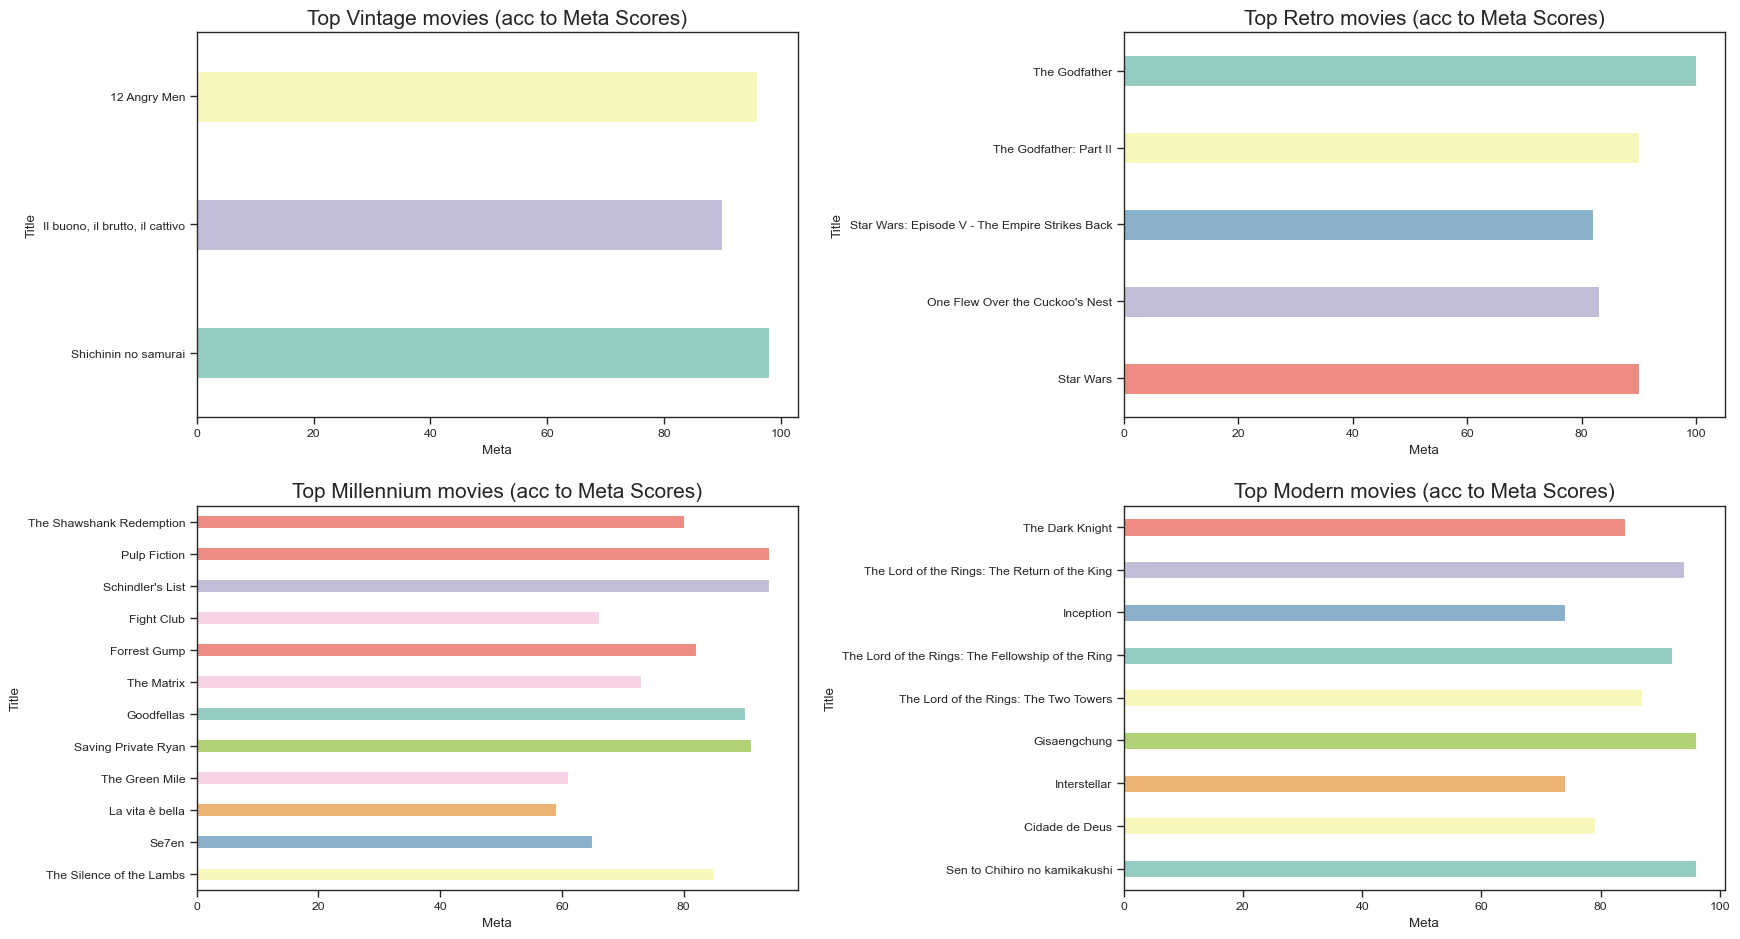

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Meta'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Top Vintage movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=retro_hits['Meta'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Top Retro movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=millennium_hits['Meta'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Top Millennium movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=modern_hits['Meta'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Top Modern movies (acc to Meta Scores)', fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


***Now we know the top 10 movies regrading the meta scores, and these movie's IMDB and also we could see the meta score of the decade's best movies***

---

##### ***Votes***

In [48]:
df['Votes'].value_counts().count()

np.int64(831)

In [49]:
top_voted = df.sort_values(['Votes'], ascending = False)

#Preview of 10 Top-voted movies of all time
#top_voted[:10]

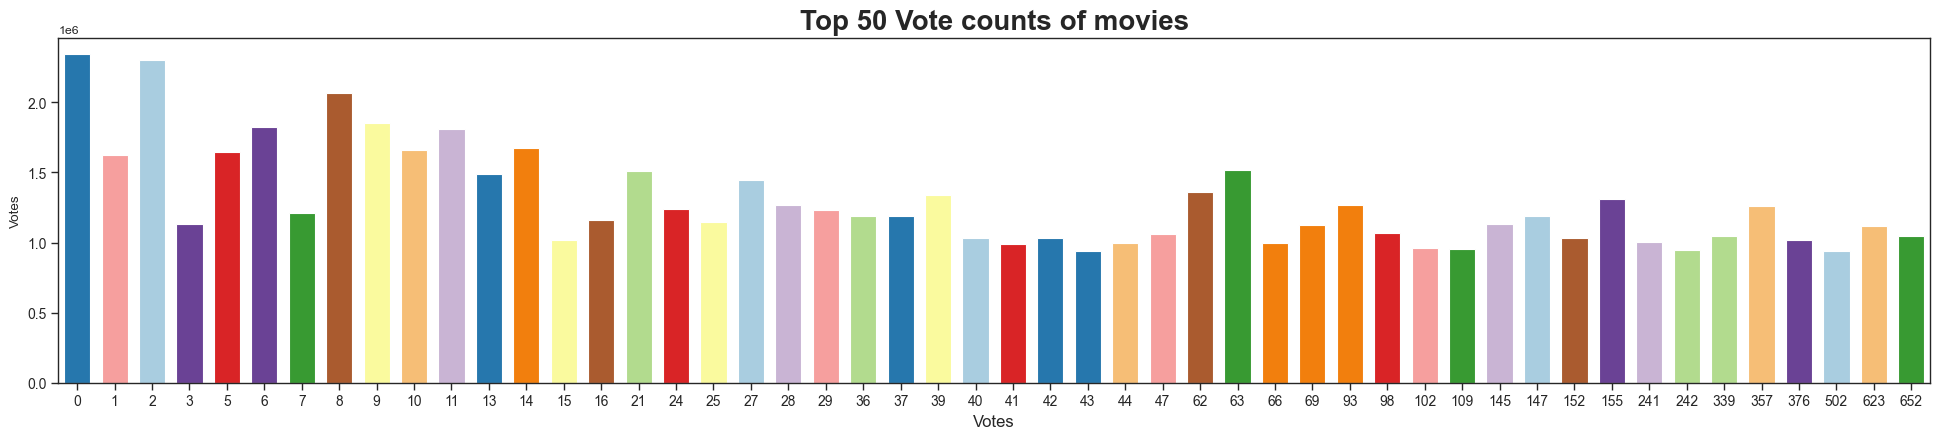

In [50]:
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=df['Votes'].sort_values(ascending=False)[:50].index, y=df['Votes'].sort_values(ascending=False)[:50], hue=df['Votes'].sort_values(ascending=False)[:50], palette='Paired', legend=False, width=0.7, saturation=.90)

g.set_title("Top 50 Vote counts of movies", weight="bold", fontsize=20)
g.set_xlabel("Votes", fontsize=12)

g.tick_params(axis='x', labelsize= 10)  
g.tick_params(axis='y', labelsize= 10)  

plt.tight_layout(pad=3, w_pad=2, h_pad=2)
plt.show()

***We have focused on the top 50 most-voted movies of all time. On the x-axis, these movies are arranged in order of their index, excluding any movies outside the top 50. The remaining movies are reorganized accordingly. Now, let's dive deeper into analyzing votes in relation to Year, IMDB, and Meta.*** 

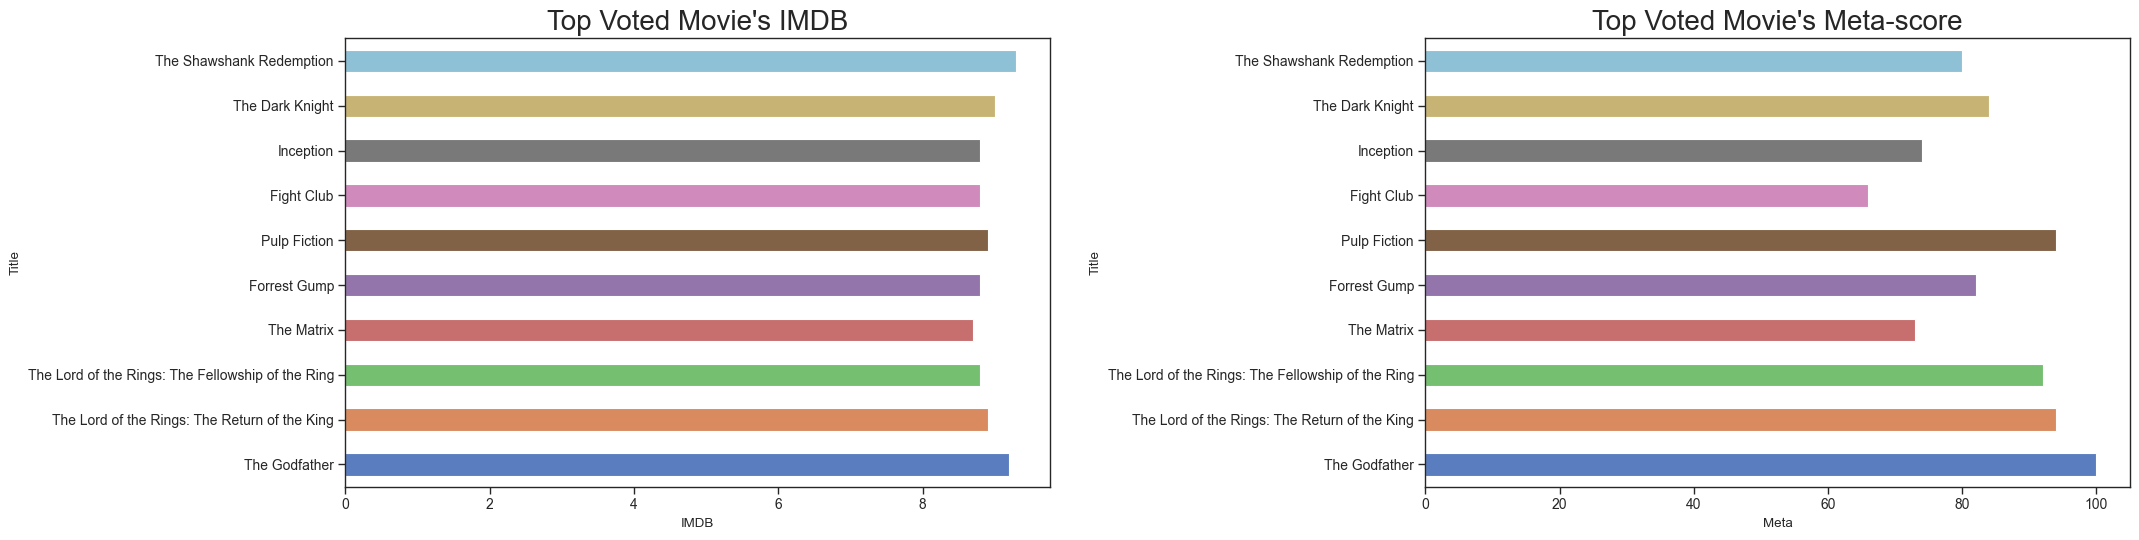

In [51]:
fig, axs = plt.subplots(1,2, figsize = (22, 6))

sns.barplot(x = top_voted['IMDB'][:10], y = top_voted['Title'][:10], hue=top_voted['Votes'][:10], legend = False, palette='muted', width=0.5, ax=axs[0])
axs[0].set_title("Top Voted Movie's IMDB", fontsize = 20)
axs[0].tick_params(axis = 'x', labelsize =10)
axs[0].tick_params(axis = 'y', labelsize =10)

sns.barplot(x = top_voted['Meta'][:10], y = top_voted['Title'][:10], hue=top_voted['Votes'][:10], legend = False, palette='muted', width=0.5, ax=axs[1])
axs[1].set_title("Top Voted Movie's Meta-score", fontsize = 20)
axs[1].tick_params(axis = 'x', labelsize =10)
axs[1].tick_params(axis = 'y', labelsize =10)

plt.tight_layout(pad=3)
plt.show()

***These plots highlight the movies with the highest IMDB and Meta scores based on voting.*** 

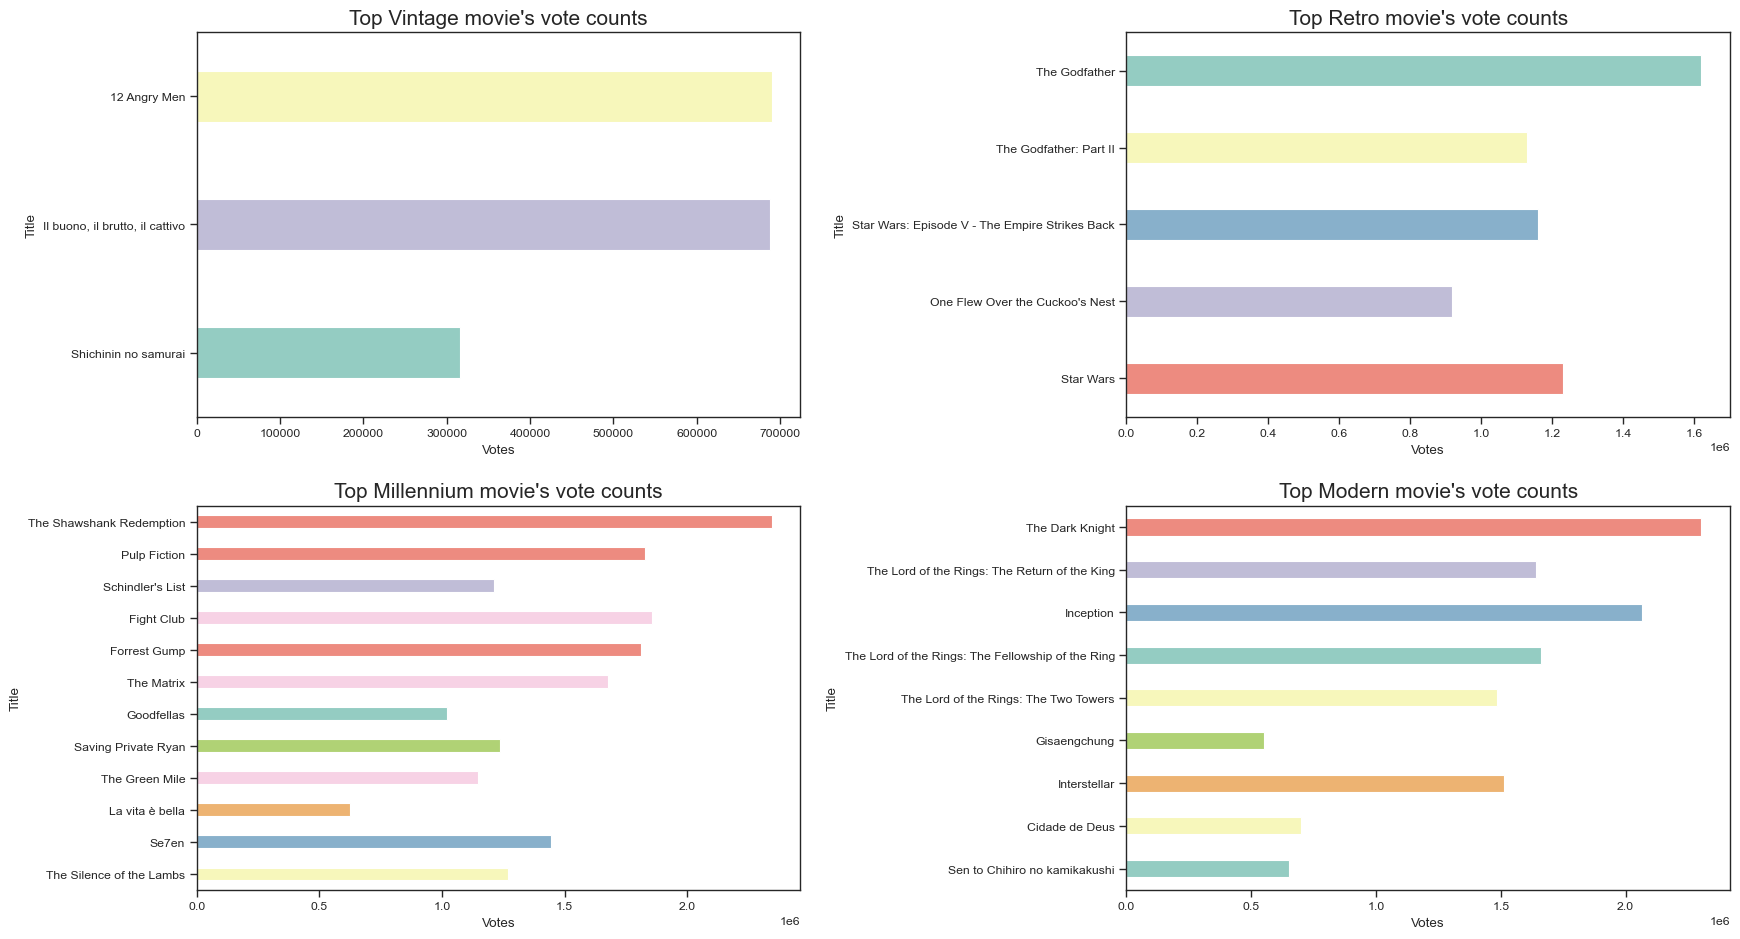

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Votes'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title("Top Vintage movie's vote counts", fontsize=15)

sns.barplot(x=retro_hits['Votes'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title("Top Retro movie's vote counts", fontsize=15)

sns.barplot(x=millennium_hits['Votes'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title("Top Millennium movie's vote counts", fontsize=15)

sns.barplot(x=modern_hits['Votes'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title("Top Modern movie's vote counts", fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


***The top IMDB-rated movies are categorized by their vote counts and grouped by decade.***

---

##### ***Genre***

In [53]:
df['Dominant_Genre'].isna().sum()

np.int64(0)

***Most seen genres & Top IMDB's genre***

In [54]:
genre_avg_imdb = df.groupby('Dominant_Genre')['IMDB'].mean()

top_genres_by_rating = genre_avg_imdb.sort_values(ascending=False)

imdb_fav_genre = df[df['Dominant_Genre'].isin(top_genres_by_rating.head(10).index)]

#Preview
#imdb_fav_genre[:10]

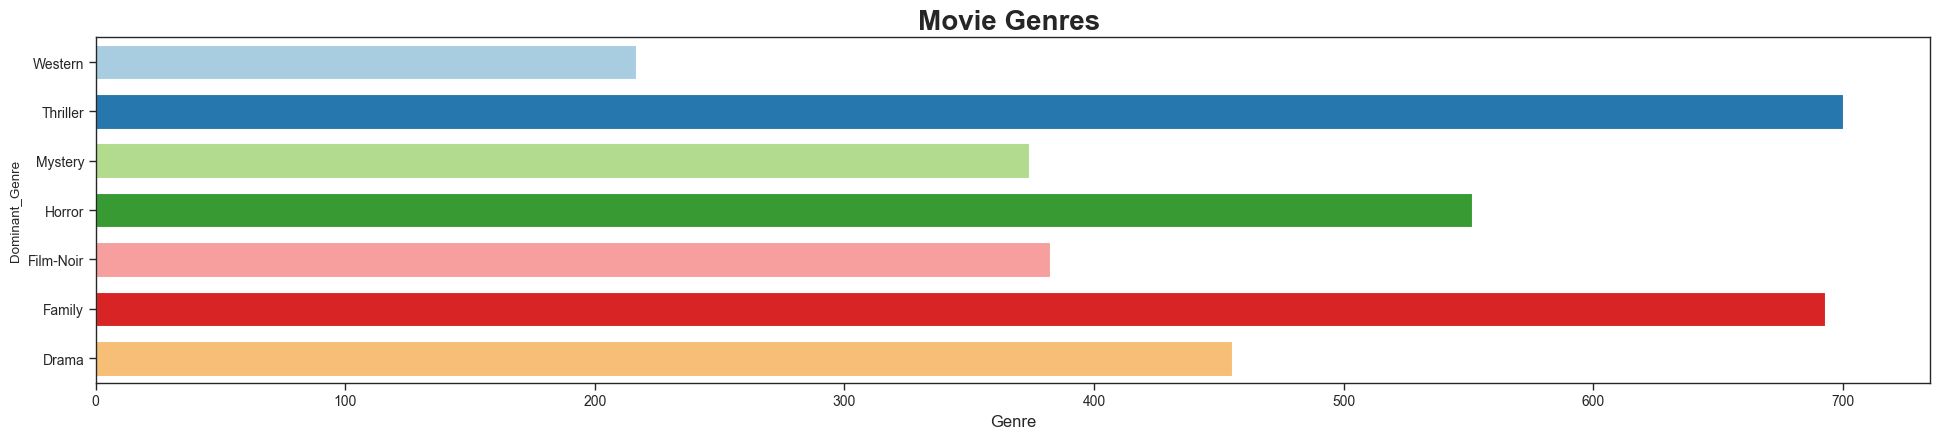

In [55]:
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=df['Dominant_Genre'].sort_values(ascending=False)[:30].index, y=df['Dominant_Genre'].sort_values(ascending=False)[:30], hue=df['Dominant_Genre'].sort_values(ascending=False)[:30], palette='Paired', legend=False, width=0.7, saturation=.90, errorbar=None)

g.set_title("Movie Genres ", weight="bold", fontsize=20)
g.set_xlabel("Genre", fontsize=12)

g.tick_params(axis='x', labelsize= 10)  
g.tick_params(axis='y', labelsize= 10)  

plt.tight_layout(pad=3, w_pad=2, h_pad=2)
plt.show()

***This plot shows us the Dominant genres with the frequencies, let's calculate with other features like IMDB, Meta, Votes and Year***

In [56]:
# df['Dominant_Genre'].value_counts()

***Since Genre is a categorical value, unlike filtering numerical features, we group the genres with a numerical feature (such as IMDb rating) and calculate the average IMDb for each genre. The genre with the highest average will be considered the most popular genre.***

In [57]:
genre_avg_imdb = df.groupby('Dominant_Genre')['IMDB'].mean()

top_genres_by_rating = genre_avg_imdb.sort_values(ascending=False)

imdb_fav_genre = df[df['Dominant_Genre'].isin(top_genres_by_rating.head(10).index)]

#Preview
#imdb_fav_genre[:10]

***Calculating the average IMDb rating per genre & sorting them based on top rated movies, coz when i filter them by 5 it seems to have only 3 of em genres.In upcoming visuals i will sort according to votes and meta***

***Top rated movie Genres***

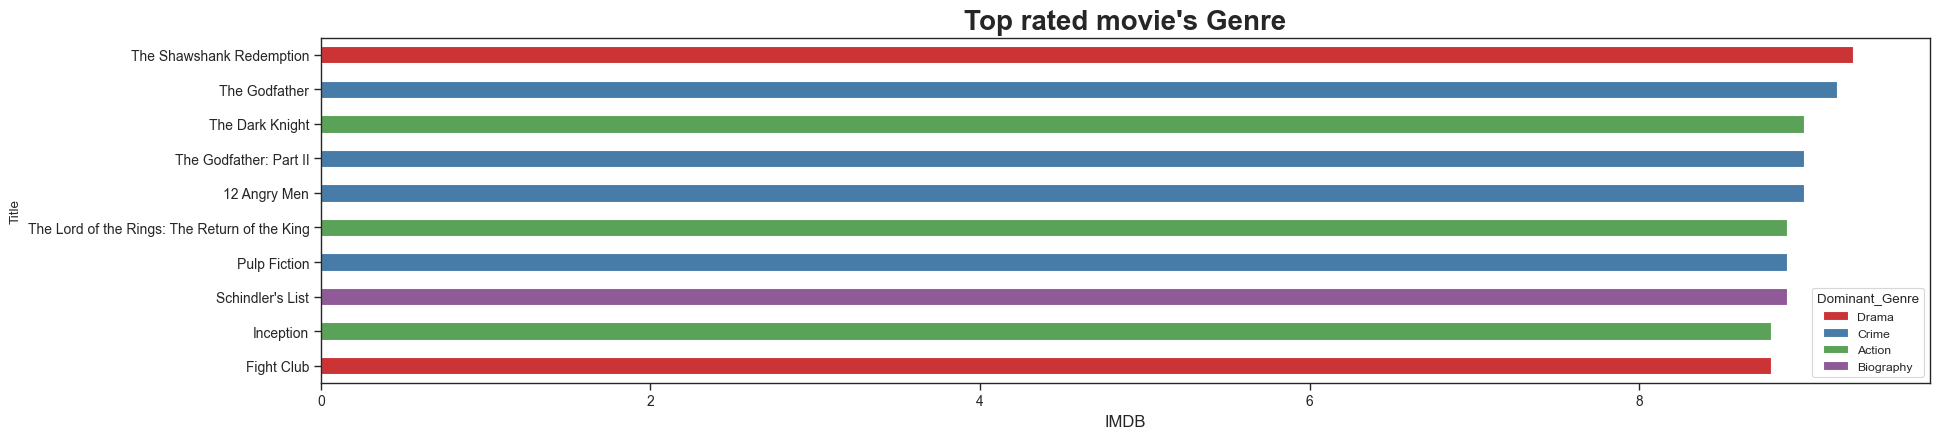

In [58]:
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=imdb_fav_genre['IMDB'][:10], y=imdb_fav_genre['Title'][:10], hue=imdb_fav_genre['Dominant_Genre'][:10], palette='Set1', legend=True, width=0.5)

g.set_title("Top rated movie's Genre", weight="bold", fontsize=20)
g.set_xlabel("IMDB", fontsize=12)

g.tick_params(axis='x', labelsize= 10)  
g.tick_params(axis='y', labelsize= 10)  

plt.tight_layout(pad = 3, h_pad=2, w_pad=2)
plt.show()

***This plot shows us the top rated movies genres***

***Movies with Highest meta score's Genre***

In [59]:
genre_avg_meta = df.groupby('Dominant_Genre')['Meta'].mean()

top_genres_by_meta = genre_avg_meta.sort_values(ascending=False)

fav_meta_genre = df[df['Dominant_Genre'].isin(top_genres_by_meta.head(10).index)]

#Preview
#fav_meta_genre[:10]

In [60]:
genre_avg_votes = df.groupby('Dominant_Genre')['Votes'].mean()

top_genres_by_votes = genre_avg_votes.sort_values(ascending=False)

fav_genre = df[df['Dominant_Genre'].isin(top_genres_by_votes.head(10).index)]

#Preview
#fav_genre[:10]

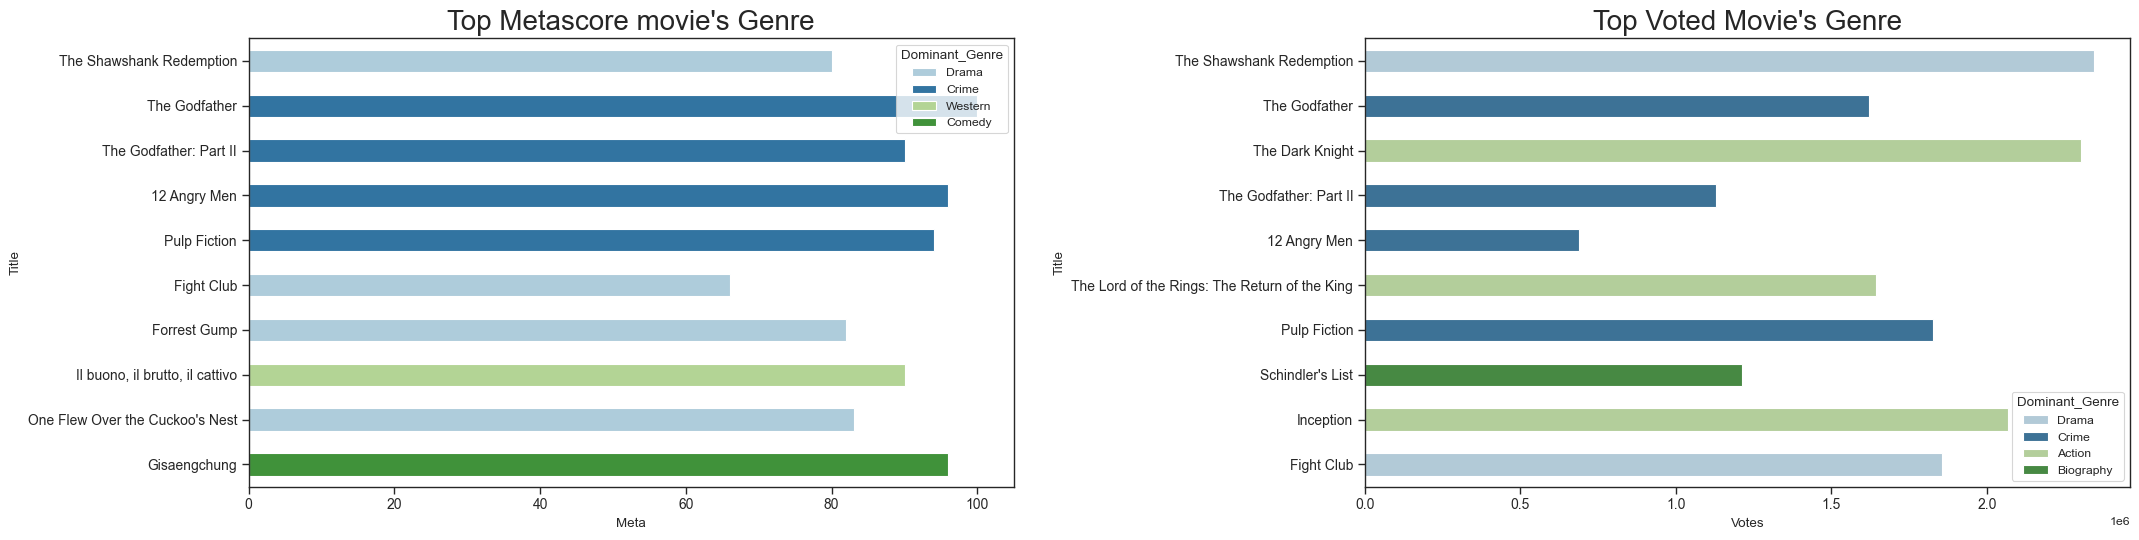

In [61]:
fig, axs = plt.subplots(1,2, figsize = (22, 6))

sns.barplot(x=fav_meta_genre['Meta'][:10], y=fav_meta_genre['Title'][:10], hue=fav_meta_genre['Dominant_Genre'][:10], palette='Paired', legend=True, width=0.5, ax=axs[0])
axs[0].set_title("Top Metascore movie's Genre", fontsize = 20)
axs[0].tick_params(axis = 'x', labelsize =10)
axs[0].tick_params(axis = 'y', labelsize =10)

sns.barplot(x=fav_genre['Votes'][:10], y=fav_genre['Title'][:10], hue=fav_genre['Dominant_Genre'][:10], palette='Paired', legend=True, width=0.5, saturation=0.60, ax = axs[1])
axs[1].set_title("Top Voted Movie's Genre", fontsize = 20)
axs[1].tick_params(axis = 'x', labelsize =10)
axs[1].tick_params(axis = 'y', labelsize =10)

plt.tight_layout(pad=3)
plt.show()

***Movies with High meta score has crime movies as its peak and most voted movies as Drame at its peak***

***Decade's best Genre acc to votes***

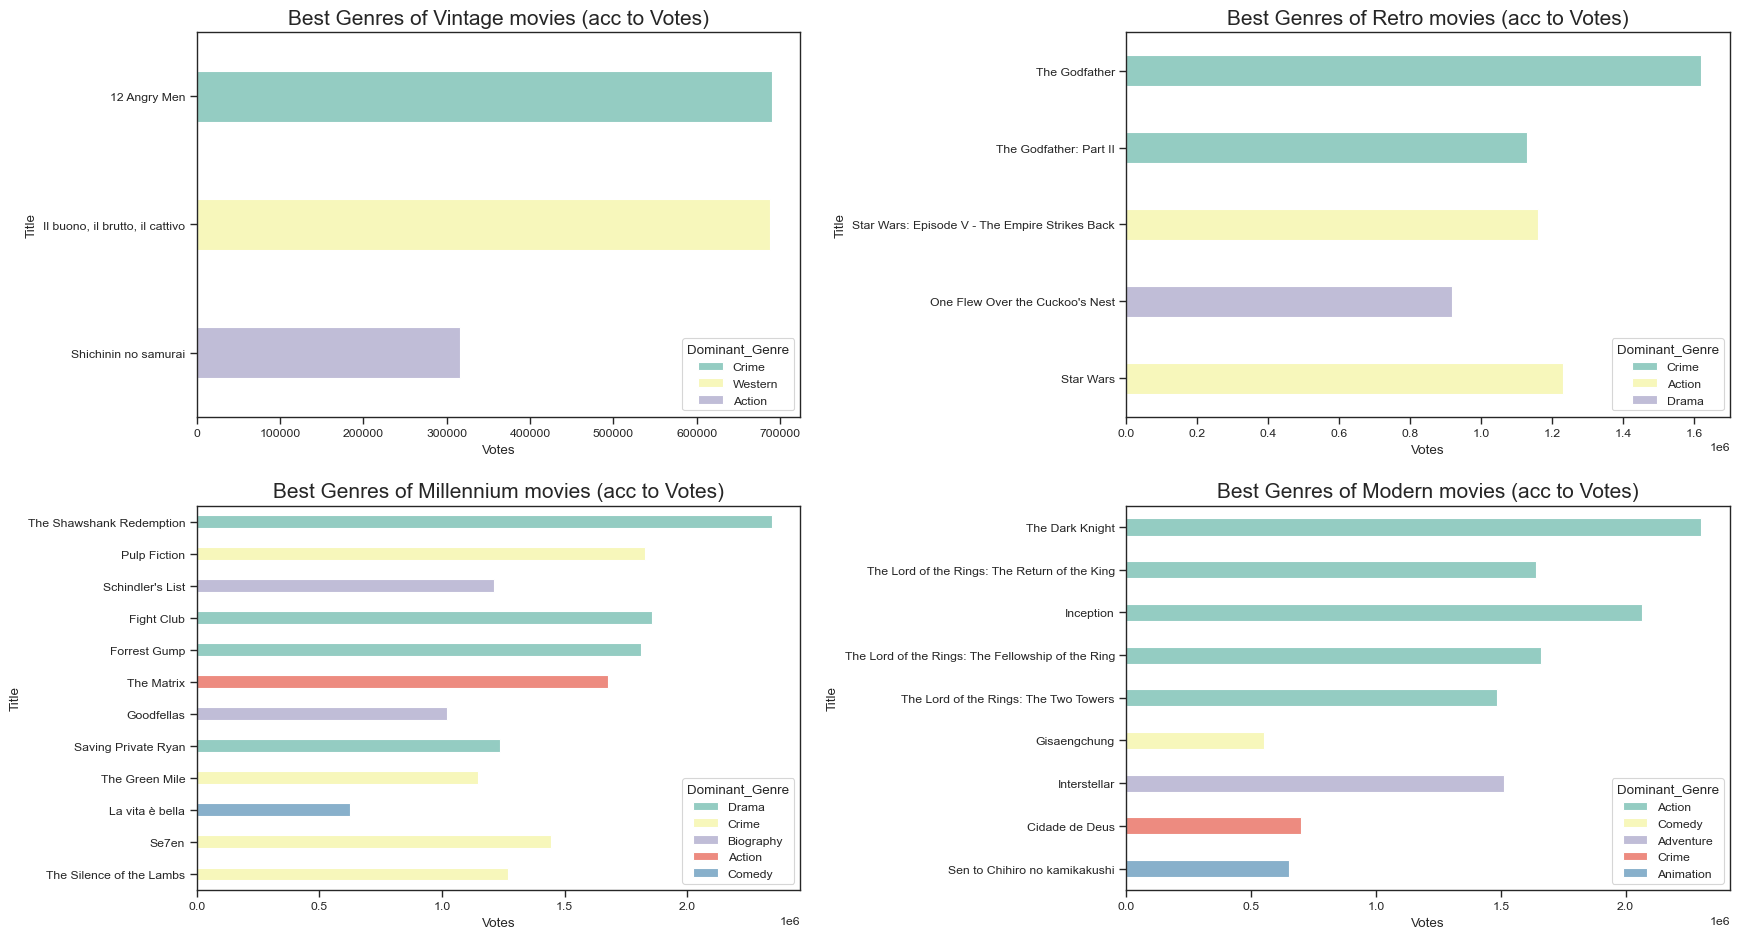

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Votes'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Best Genres of Vintage movies (acc to Votes)', fontsize=15)

sns.barplot(x=retro_hits['Votes'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Best Genres of Retro movies (acc to Votes)', fontsize=15)

sns.barplot(x=millennium_hits['Votes'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Best Genres of Millennium movies (acc to Votes)', fontsize=15)

sns.barplot(x=modern_hits['Votes'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Best Genres of Modern movies (acc to Votes)', fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


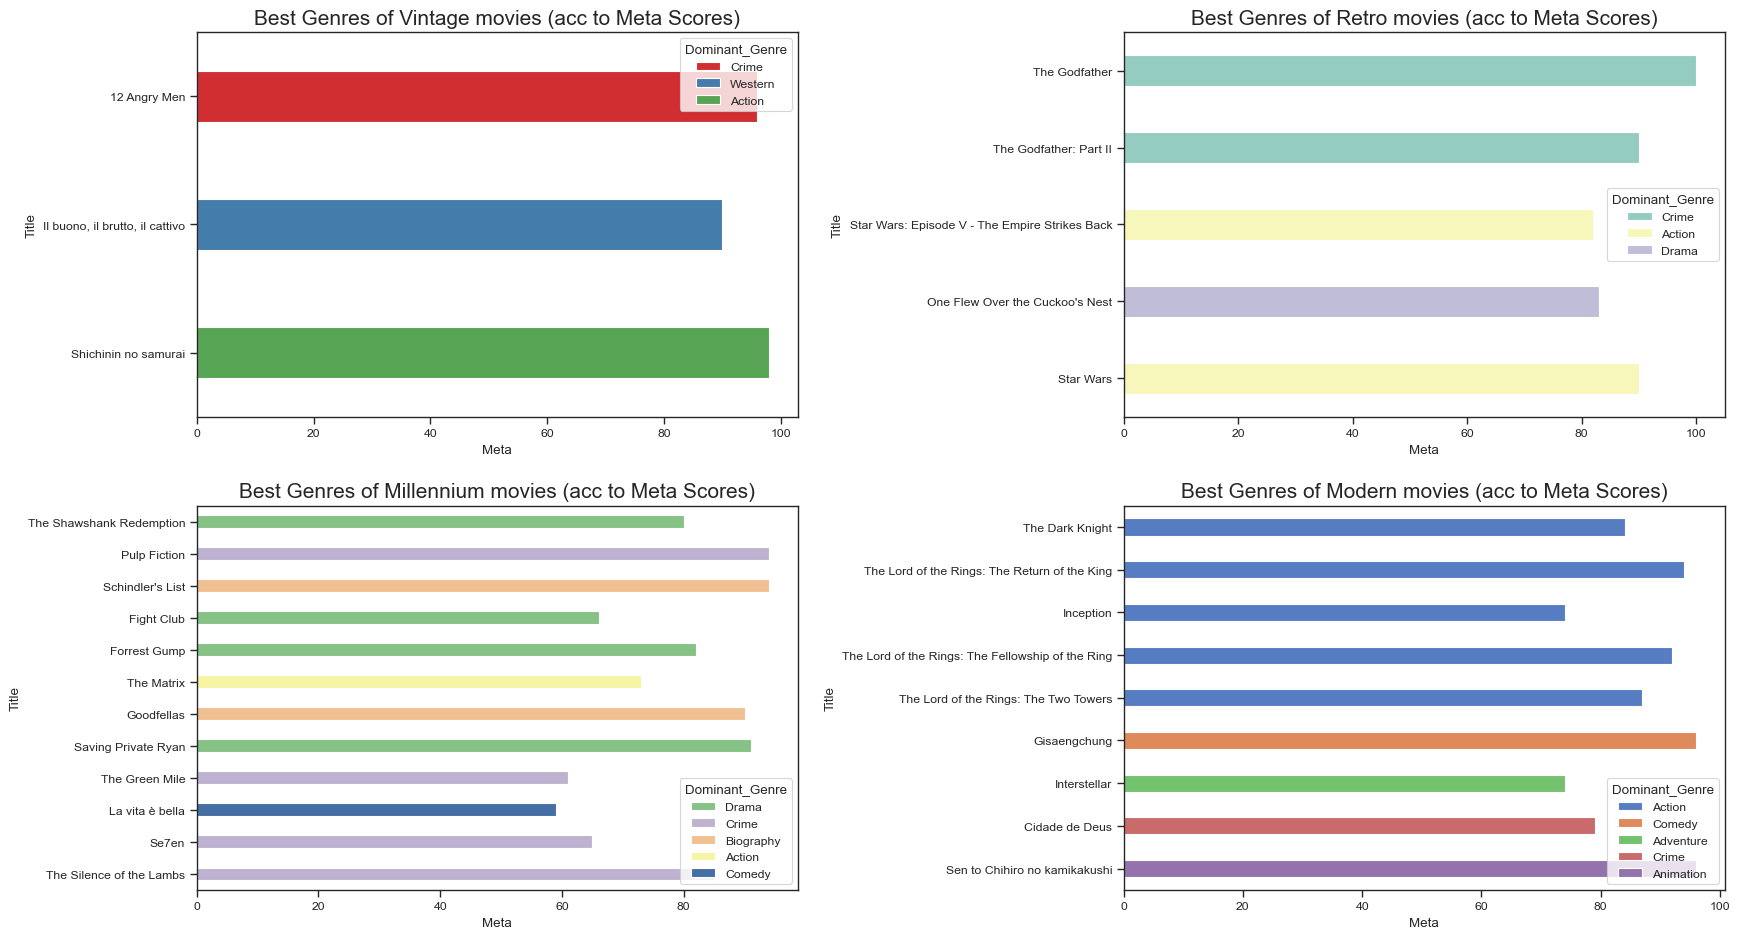

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Meta'], y=vintage_hits['Title'], palette='Set1', hue=vintage_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Best Genres of Vintage movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=retro_hits['Meta'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Best Genres of Retro movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=millennium_hits['Meta'], y=millennium_hits['Title'], palette='Accent', hue=millennium_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Best Genres of Millennium movies (acc to Meta Scores)', fontsize=15)

sns.barplot(x=modern_hits['Meta'], y=modern_hits['Title'], palette='muted', hue=modern_hits['Dominant_Genre'], legend=True, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Best Genres of Modern movies (acc to Meta Scores)', fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)

----

##### ***Runtime***

In [64]:
df['Runtime'].isna().sum()

np.int64(0)

In [65]:
df['Runtime'].value_counts().count()

np.int64(133)

***Most frequent Runtime***

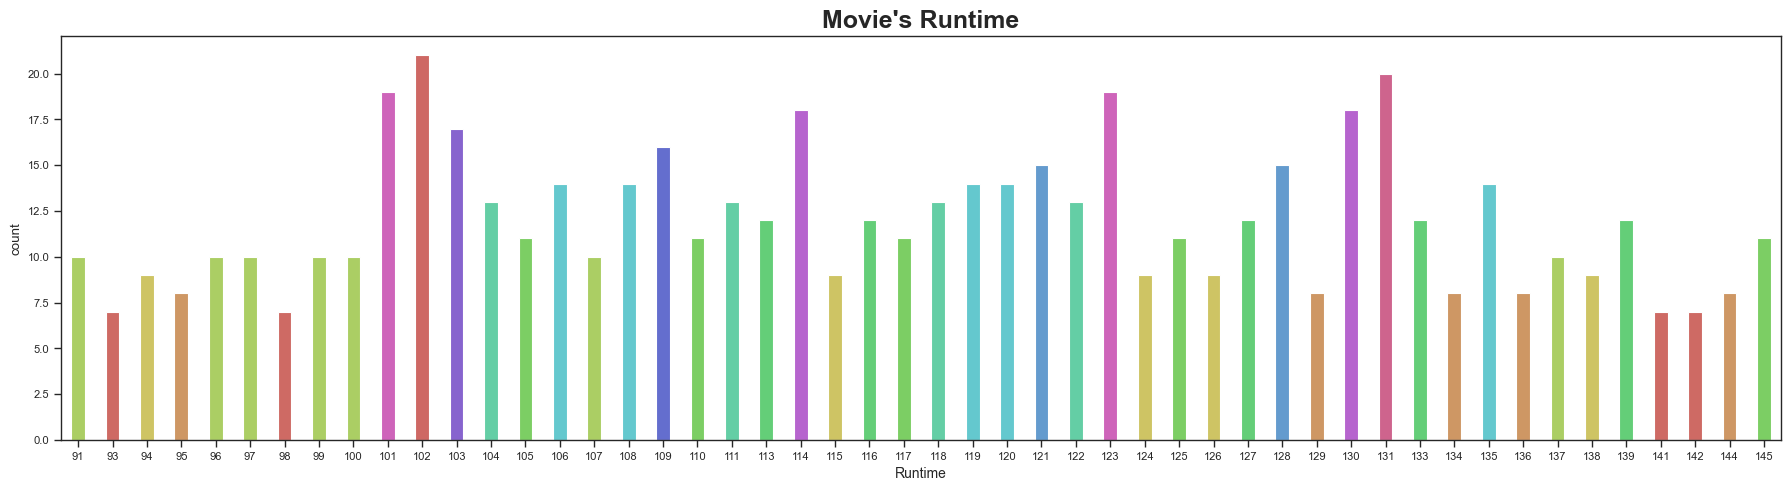

In [66]:
fig, axs = plt.subplots(figsize=(18, 5))
g = sns.barplot(x=df['Runtime'].value_counts()[:50].index, y=df['Runtime'].value_counts()[:50], palette='hls', hue=df['Runtime'].value_counts()[:50], legend=False, width=0.4, saturation=.80)

g.set_title("Movie's Runtime", weight="bold", fontsize=18)
g.set_xlabel("Runtime", fontsize=10)

g.tick_params(axis='x', labelsize= 8)  
g.tick_params(axis='y', labelsize= 8)  

plt.tight_layout()
plt.show()

***Most movies have a duration of 1hour 42 mins***

***Runtime of top movies regarding IMDB & Meta scores***

In [67]:
high_duration = df.sort_values(['Runtime'], ascending=False)

#Preview
#high_duration[:10]

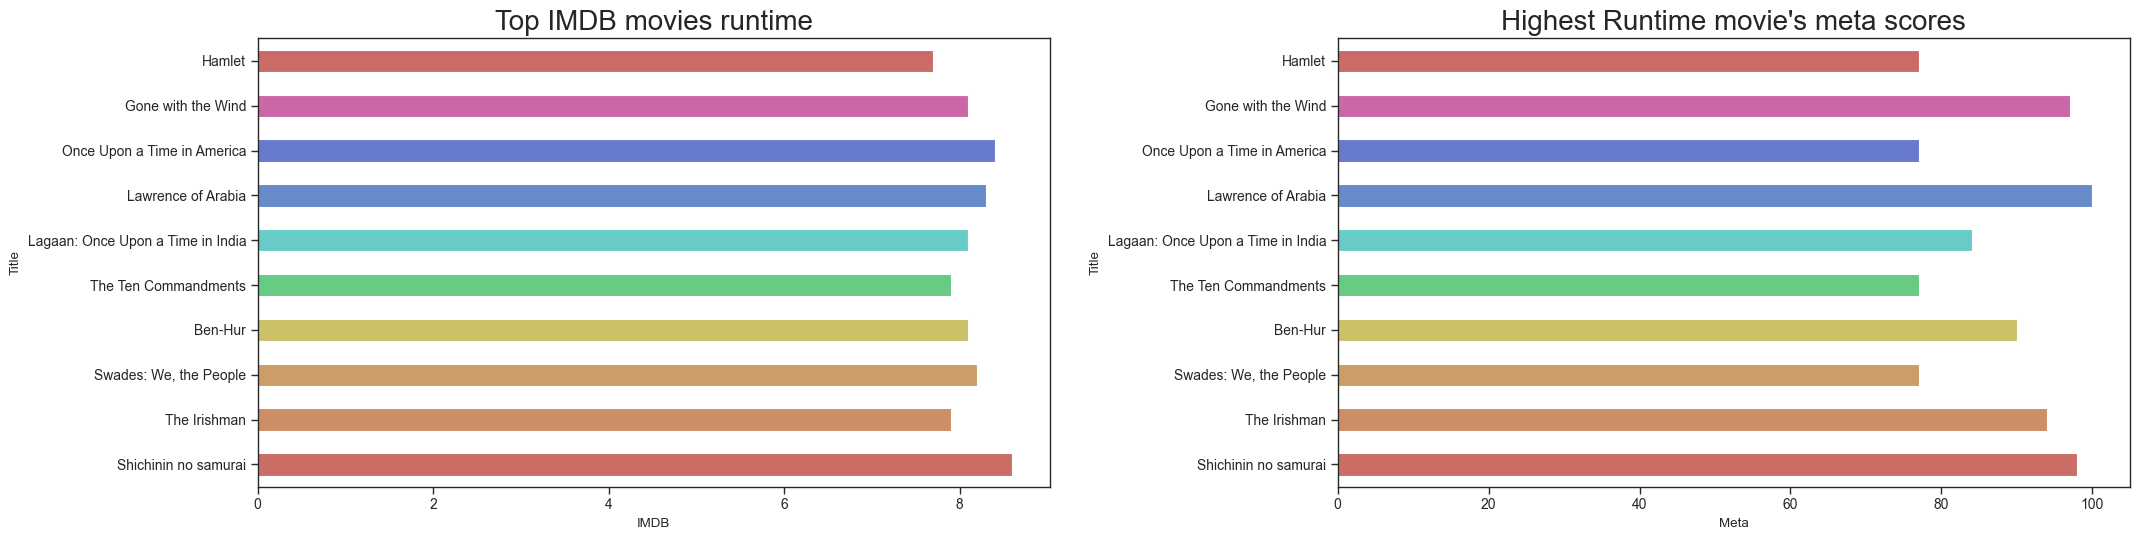

In [68]:
fig, axs = plt.subplots(1,2, figsize = (22, 6))

sns.barplot(x=high_duration['IMDB'][:10], y=high_duration['Title'][:10], hue=high_duration['Runtime'][:10], palette='hls', legend=False, width=0.5, ax= axs[0])
axs[0].set_title("Top IMDB movies runtime", fontsize = 20)
axs[0].tick_params(axis = 'x', labelsize =10)
axs[0].tick_params(axis = 'y', labelsize =10)

sns.barplot(x=high_duration['Meta'][:10], y=high_duration['Title'][:10], hue=high_duration['Runtime'][:10], palette='hls', legend=False, width=0.5, ax =axs[1])
axs[1].set_title("Highest Runtime movie's meta scores", fontsize = 20)
axs[1].tick_params(axis = 'x', labelsize =10)
axs[1].tick_params(axis = 'y', labelsize =10)

plt.tight_layout(pad=3)
plt.show()

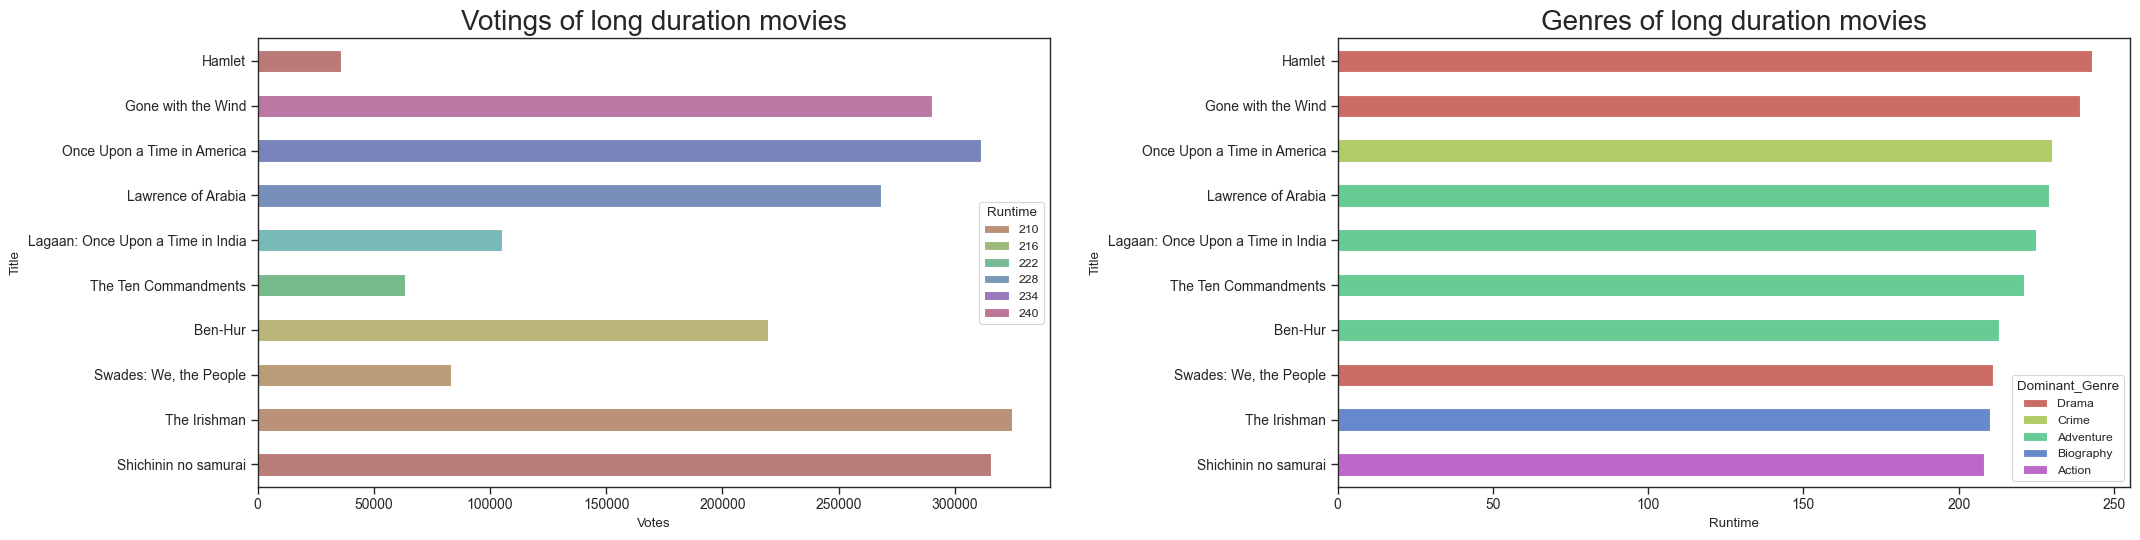

In [69]:
fig, axs = plt.subplots(1,2, figsize = (22, 6))

sns.barplot(x=high_duration['Votes'][:10], y=high_duration['Title'][:10], hue=high_duration['Runtime'][:10], palette='hls', legend=True, width=0.5, saturation=0.50, ax= axs[0])
axs[0].set_title("Votings of long duration movies", fontsize = 20)
axs[0].tick_params(axis = 'x', labelsize =10)
axs[0].tick_params(axis = 'y', labelsize =10)

sns.barplot(x=high_duration['Runtime'][:10], y=high_duration['Title'][:10], hue=high_duration['Dominant_Genre'][:10], palette='hls', legend=True, width=0.5, saturation=0.750, ax= axs[1])
axs[1].set_title("Genres of long duration movies", fontsize = 20)
axs[1].tick_params(axis = 'x', labelsize =10)
axs[1].tick_params(axis = 'y', labelsize =10)

plt.tight_layout(pad=3)
plt.show()

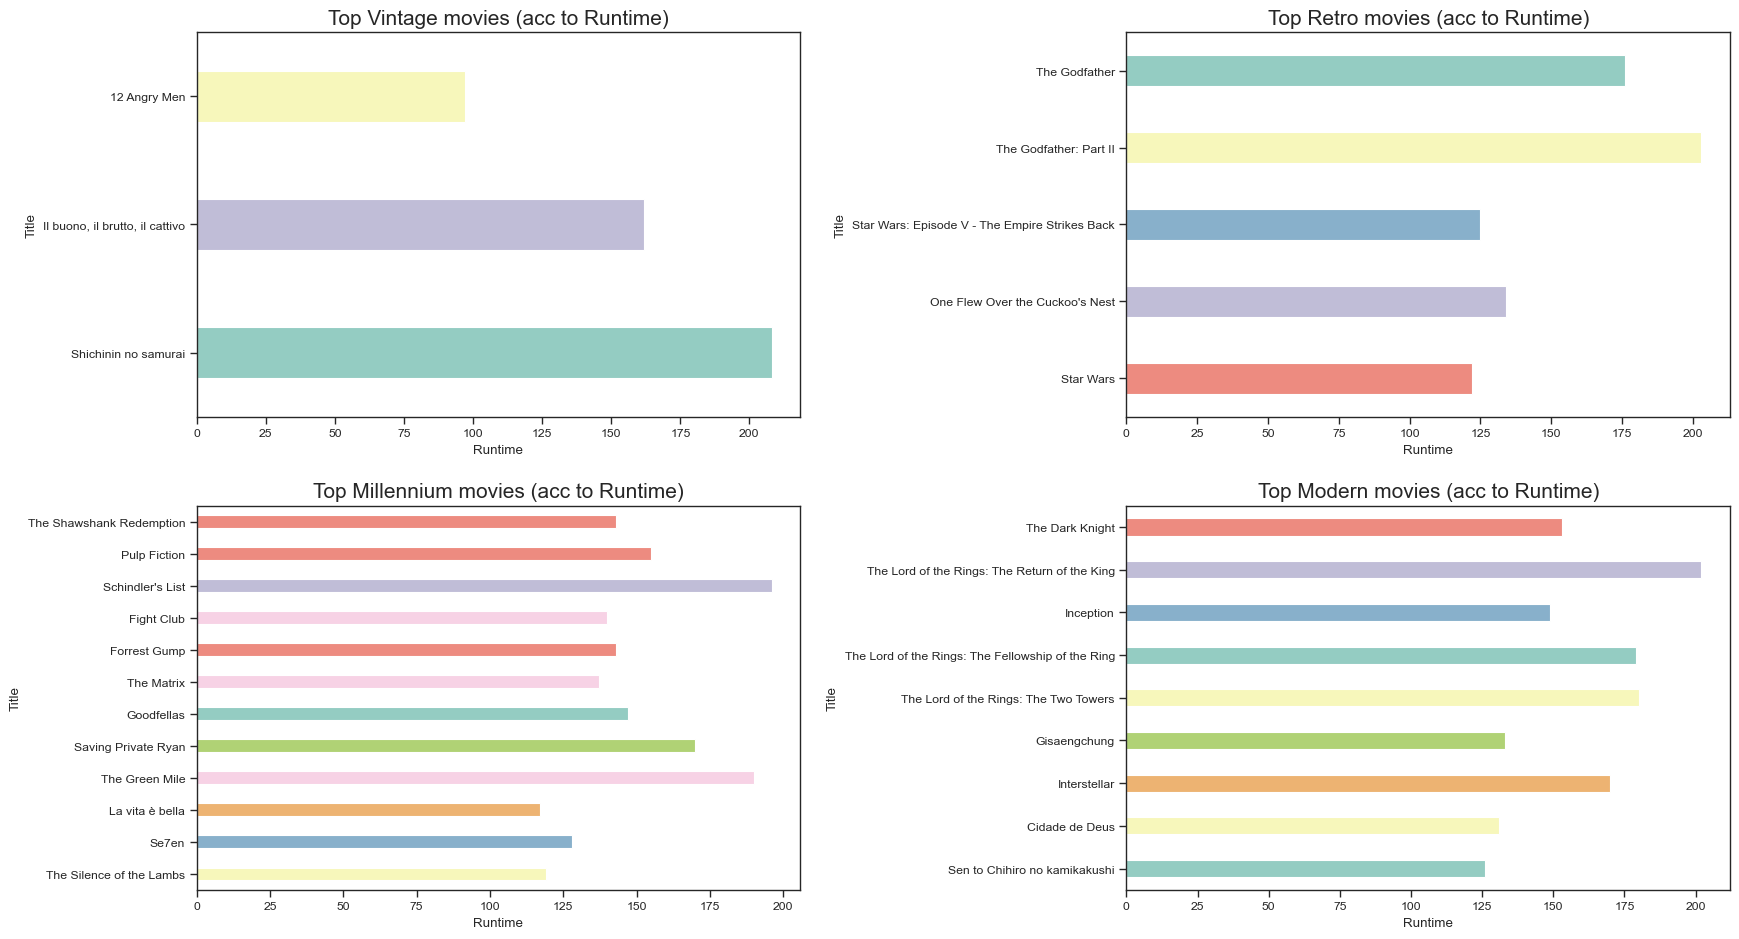

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Runtime'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Top Vintage movies (acc to Runtime)', fontsize=15)

sns.barplot(x=retro_hits['Runtime'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Top Retro movies (acc to Runtime)', fontsize=15)

sns.barplot(x=millennium_hits['Runtime'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Top Millennium movies (acc to Runtime)', fontsize=15)

sns.barplot(x=modern_hits['Runtime'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Top Modern movies (acc to Runtime)', fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


##### ***Gross***

In [71]:
high_gross = df.sort_values(['Gross'], ascending=False)
#high_gross[:10]

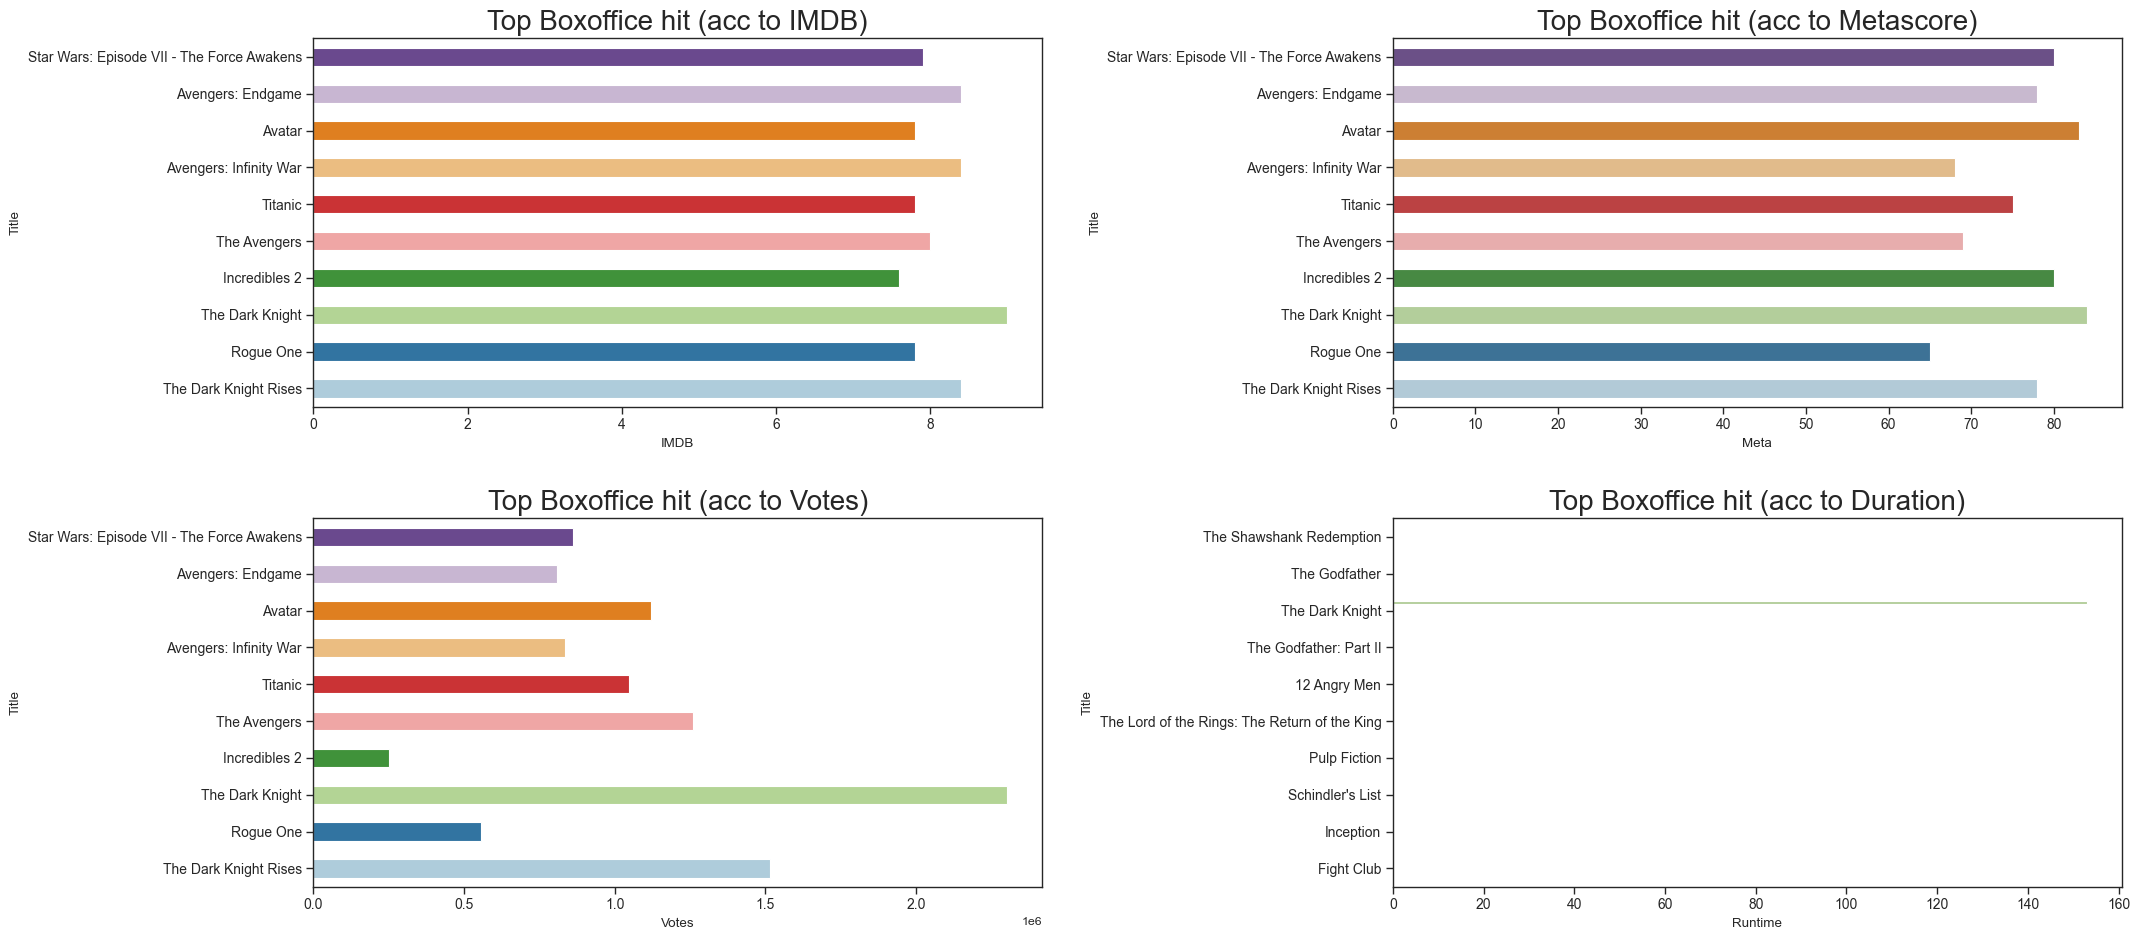

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(22, 10))  

sns.barplot(x=high_gross['IMDB'][:10], y=high_gross['Title'][:10], hue=high_gross['Gross'][:10], palette='Paired',legend=False, width=0.5, ax=axs[0, 0])
axs[0, 0].set_title("Top Boxoffice hit (acc to IMDB)", fontsize=20)
axs[0, 0].tick_params(axis='x', labelsize=10)
axs[0, 0].tick_params(axis='y', labelsize=10)

sns.barplot(x=high_gross['Meta'][:10],y=high_gross['Title'][:10],hue=high_gross['Gross'][:10], palette='Paired',legend=False, width=0.5, saturation=0.6, ax=axs[0, 1])
axs[0, 1].set_title("Top Boxoffice hit (acc to Metascore)", fontsize=20)
axs[0, 1].tick_params(axis='x', labelsize=10)
axs[0, 1].tick_params(axis='y', labelsize=10)

sns.barplot( x=high_gross['Votes'][:10], y=high_gross['Title'][:10], hue=high_gross['Gross'][:10], palette='Paired',legend=False, width=0.5, ax=axs[1, 0])
axs[1, 0].set_title("Top Boxoffice hit (acc to Votes)", fontsize=20)
axs[1, 0].tick_params(axis='x', labelsize=10)
axs[1, 0].tick_params(axis='y', labelsize=10)

sns.barplot(x=high_gross['Runtime'][:10],y=fav_genre['Title'][:10],hue=high_gross['Gross'][:10],palette='Paired',legend=False,width=0.9,saturation=0.6,ax=axs[1, 1])
axs[1, 1].set_title("Top Boxoffice hit (acc to Duration)", fontsize=20)
axs[1, 1].tick_params(axis='x', labelsize=10)
axs[1, 1].tick_params(axis='y', labelsize=10)

plt.tight_layout(pad=3)
plt.show()


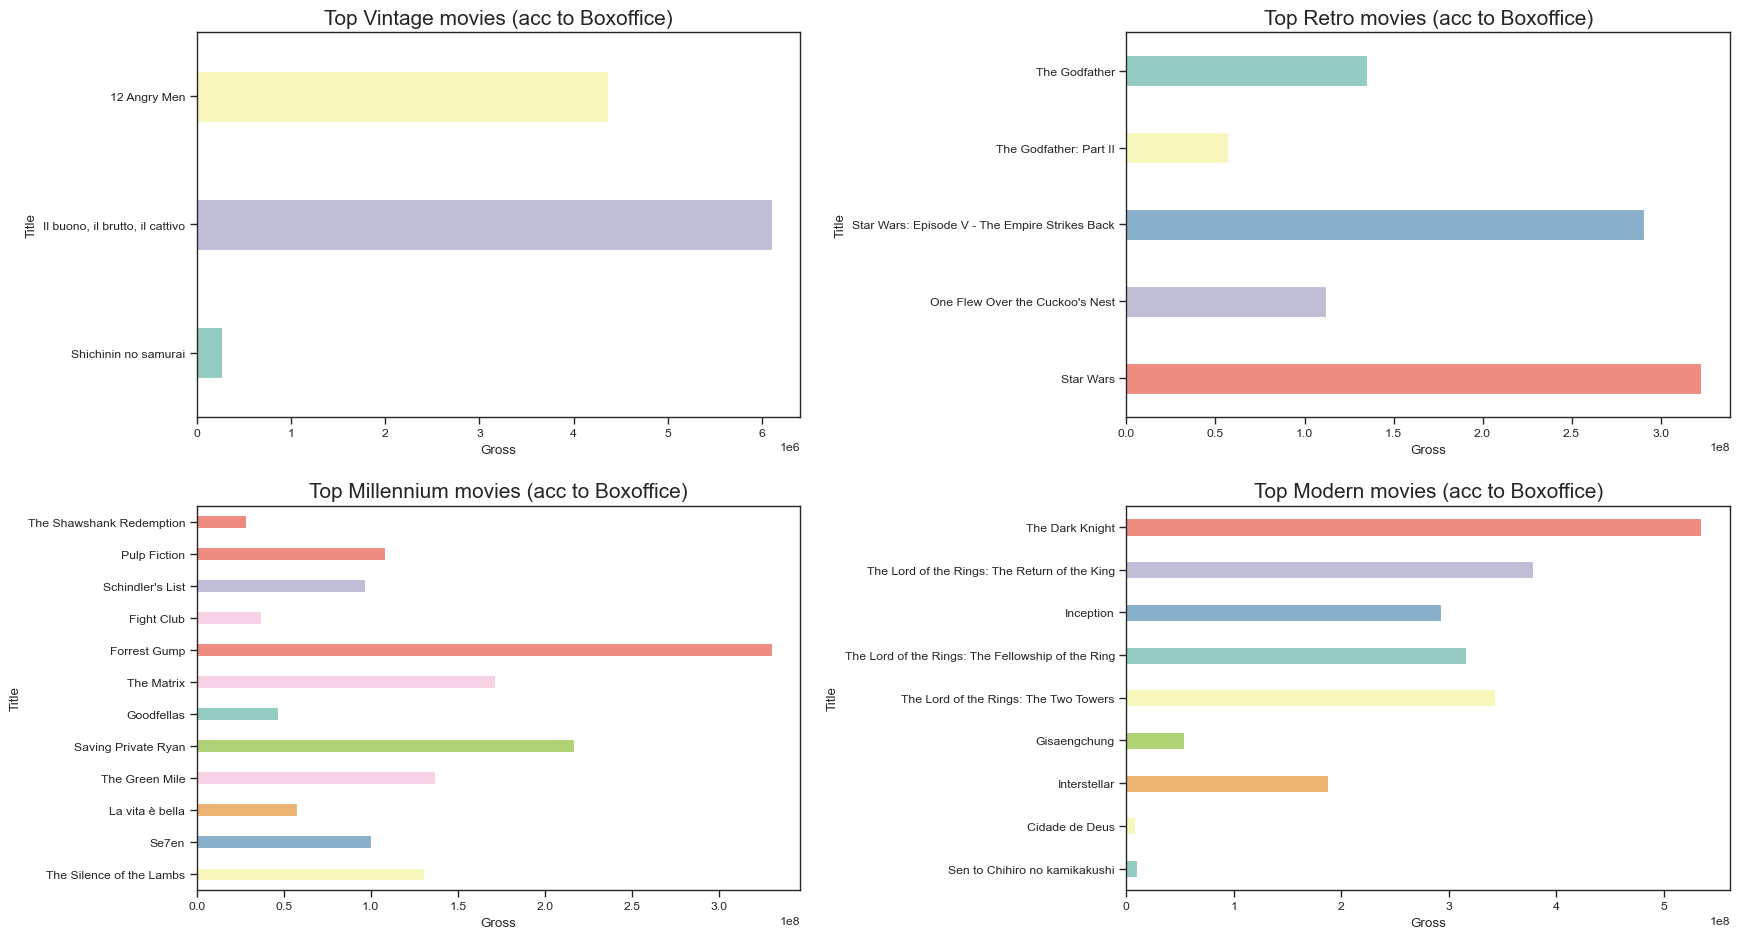

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(x=vintage_hits['Gross'], y=vintage_hits['Title'], palette='Set3', hue=vintage_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 0])
axs[0, 0].set_title('Top Vintage movies (acc to Boxoffice)', fontsize=15)

sns.barplot(x=retro_hits['Gross'], y=retro_hits['Title'], palette='Set3', hue=retro_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[0, 1])
axs[0, 1].set_title('Top Retro movies (acc to Boxoffice)', fontsize=15)

sns.barplot(x=millennium_hits['Gross'], y=millennium_hits['Title'], palette='Set3', hue=millennium_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 0])
axs[1, 0].set_title('Top Millennium movies (acc to Boxoffice)', fontsize=15)

sns.barplot(x=modern_hits['Gross'], y=modern_hits['Title'], palette='Set3', hue=modern_hits['Year'], legend=False, width=0.4, saturation=.80, ax=axs[1, 1])
axs[1, 1].set_title('Top Modern movies (acc to Boxoffice)', fontsize=15)

plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.show()


---

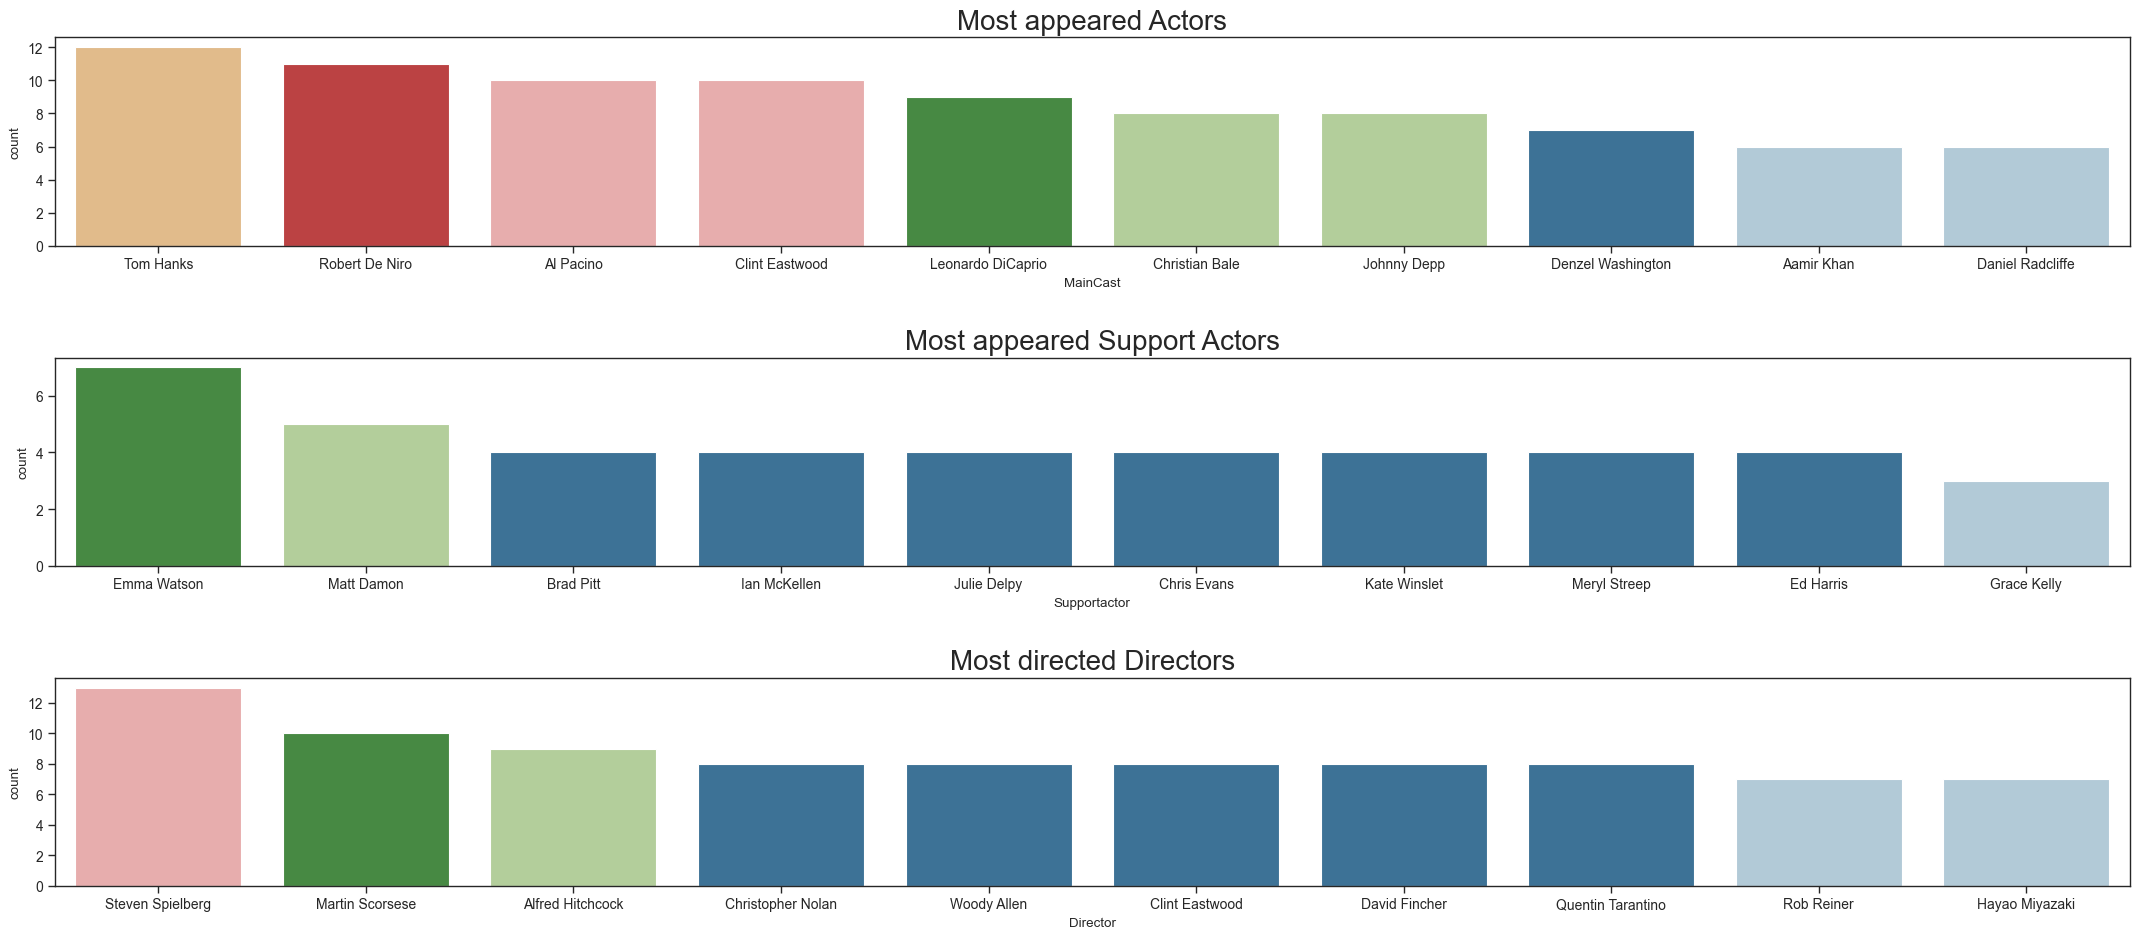

In [74]:
fig, axs = plt.subplots(3,1, figsize = (22, 10))

sns.barplot(x = df['MainCast'].value_counts()[:10].index, y = df['MainCast'].value_counts()[:10], hue = df['MainCast'].value_counts()[:10], legend=False, palette='Paired', width=0.8, saturation=0.60, ax = axs[0])
axs[0].set_title("Most appeared Actors", fontsize = 20)
axs[0].tick_params(axis = 'x', labelsize = 10)
axs[0].tick_params(axis = 'y', labelsize = 10)

sns.barplot(x = df['Supportactor'].value_counts()[:10].index, y = df['Supportactor'].value_counts()[:10], hue = df['Supportactor'].value_counts()[:10], legend=False, palette='Paired', width=0.8, saturation=0.60, ax = axs[1])
axs[1].set_title("Most appeared Support Actors", fontsize = 20)
axs[1].tick_params(axis = 'x', labelsize = 10)
axs[1].tick_params(axis = 'y', labelsize = 10)

sns.barplot(x = df['Director'].value_counts()[:10].index, y = df['Director'].value_counts()[:10], hue = df['Director'].value_counts()[:10], legend=False, palette='Paired', width=0.8, saturation=0.60, ax = axs[2])
axs[2].set_title("Most directed Directors", fontsize = 20)
axs[2].tick_params(axis = 'x', labelsize = 10)
axs[2].tick_params(axis = 'y', labelsize = 10)

plt.tight_layout(pad=3)
plt.show()

***These plots highlights the most influential contributors in the film industry. Tom Hanks, Robert De Niro, and Al Pacino lead as the most frequently appearing main actors, while Emma Watson and Matt Damon dominate the supporting actor category. In directing, Steven Spielberg, Martin Scorsese, and Alfred Hitchcock stand out as the most prolific directors. These visualizations emphasize the dominance of key individuals in shaping cinematic history, reflecting their consistent presence and impact.***

---

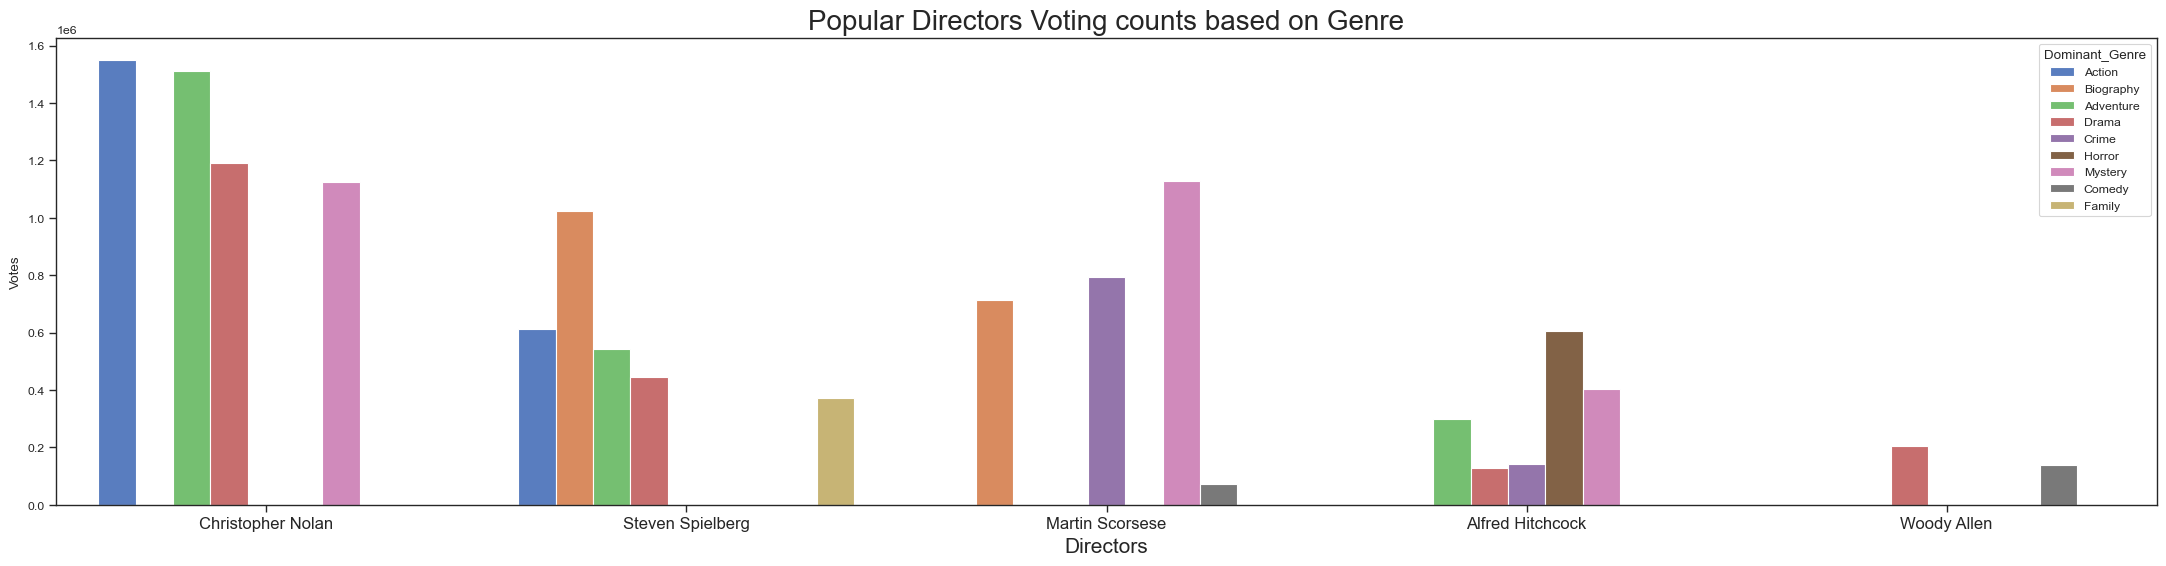

In [75]:
popular_directors = df['Director'].value_counts().head(5).index

Popular_directors = df[df['Director'].isin(popular_directors)]

fig, axs = plt.subplots(figsize=(22, 6))
g = sns.barplot(x=Popular_directors['Director'], y=Popular_directors['Votes'], hue=Popular_directors['Dominant_Genre'], legend=True, palette='muted', width = 0.8, errorbar=None)
g.set_title('Popular Directors Voting counts based on Genre', fontsize = 20)
g.set_xlabel('Directors', fontsize = 15)
g.tick_params(axis = 'x', labelsize = 12)  
plt.tight_layout(pad=2, w_pad=50)
plt.show()

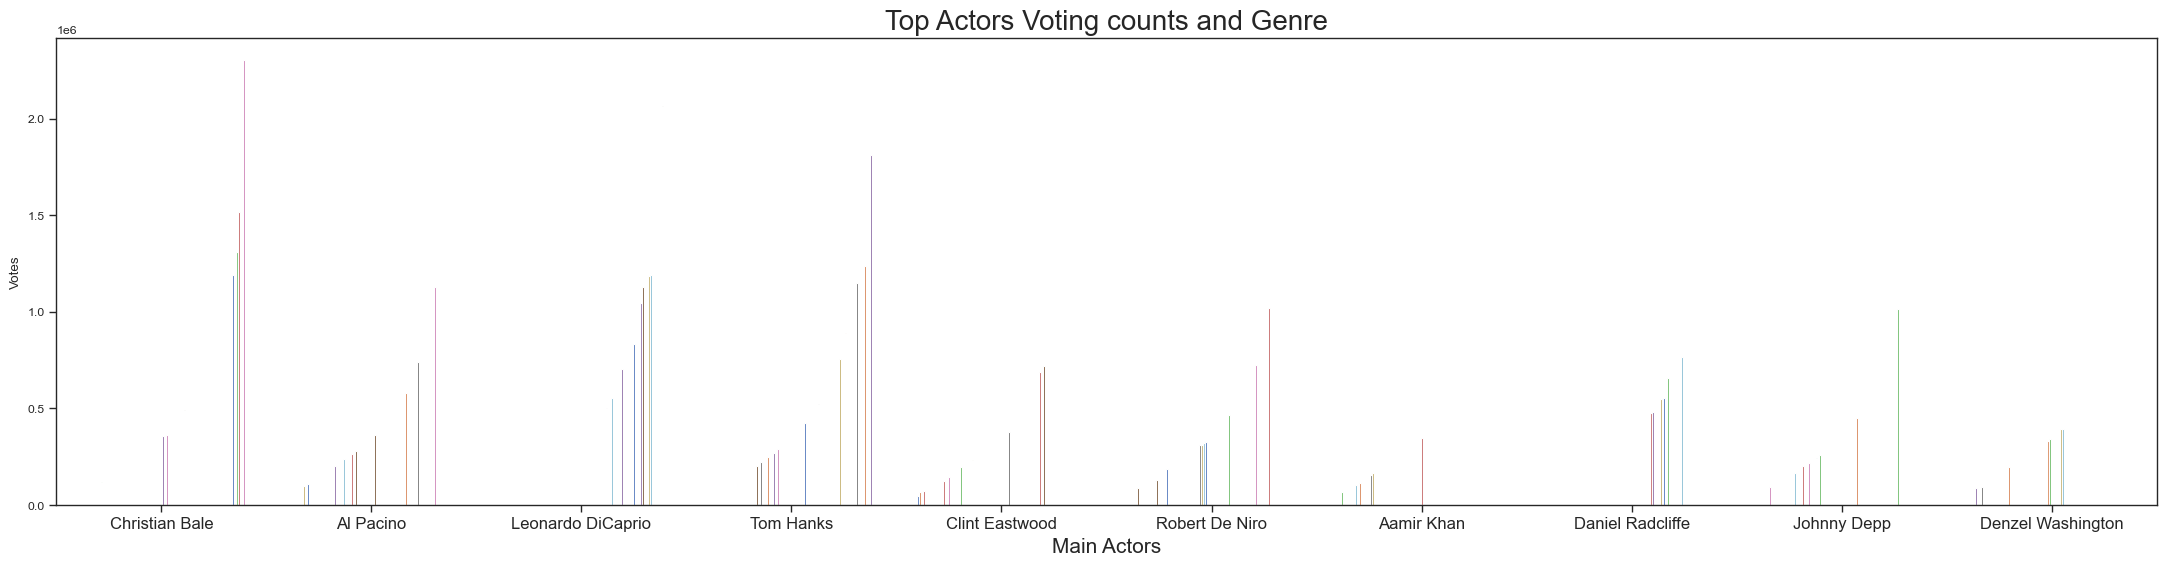

In [76]:
top_maincast = df['MainCast'].value_counts().head(10).index

Top_actors = df[df['MainCast'].isin(top_maincast)]

fig, axs = plt.subplots(figsize=(22, 6))
g = sns.barplot(x=Top_actors['MainCast'], y=Top_actors['Votes'], hue=Top_actors['Votes'], legend=False, palette='muted')
g.set_title('Top Actors Voting counts and Genre', fontsize = 20)
g.set_xlabel('Main Actors', fontsize = 15)
g.tick_params(axis = 'x', labelsize = 12)  
plt.tight_layout(pad=2)
plt.show()

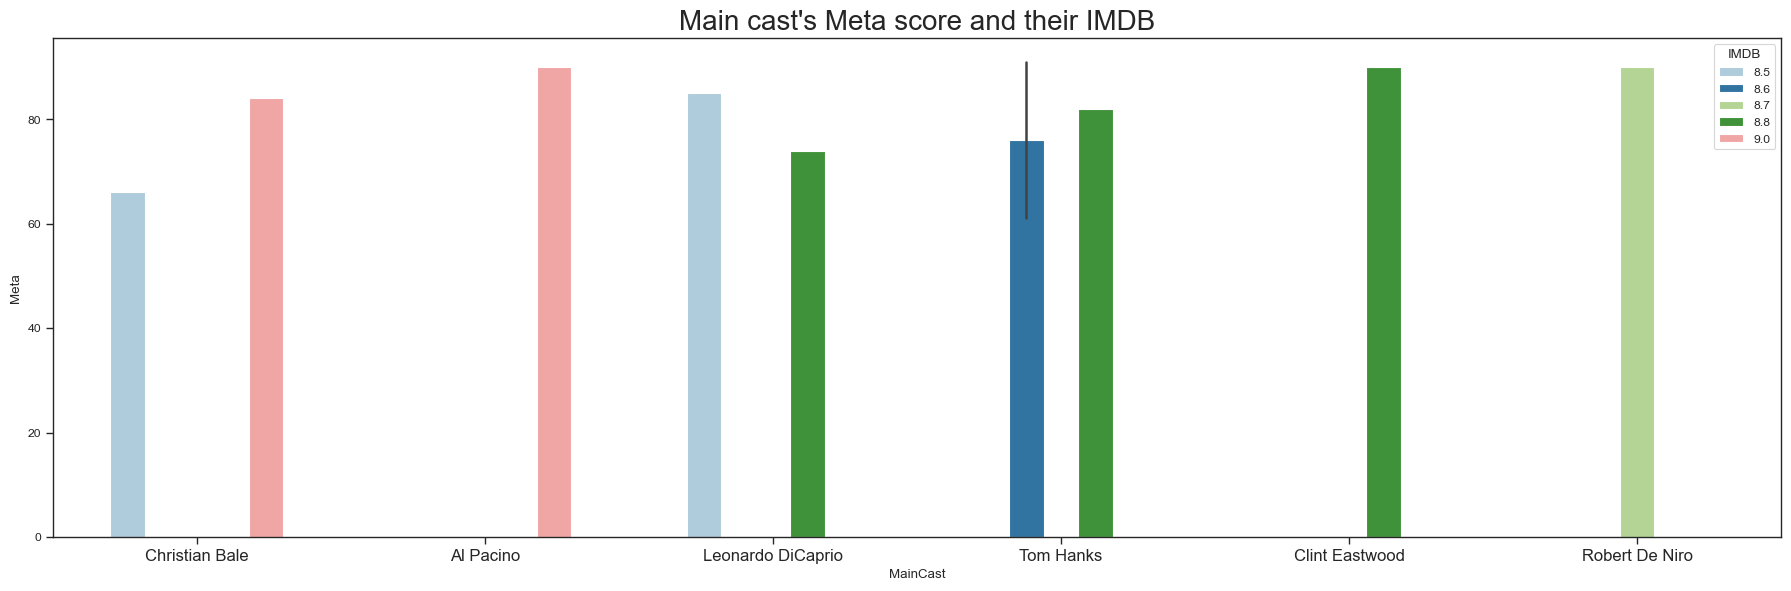

In [77]:
fig, axs = plt.subplots(figsize = (18, 6))
g = sns.barplot(x = Top_actors['MainCast'][:10], y = Top_actors['Meta'][:10], hue = Top_actors['IMDB'][:10], legend=True, width=0.6, palette='Paired')
g.set_title("Main cast's Meta score and their IMDB", fontsize = 20)
g.tick_params(axis = 'x', labelsize = 12)
g.tick_params(axis = 'x', labelsize = 12)
plt.tight_layout()
plt.show()

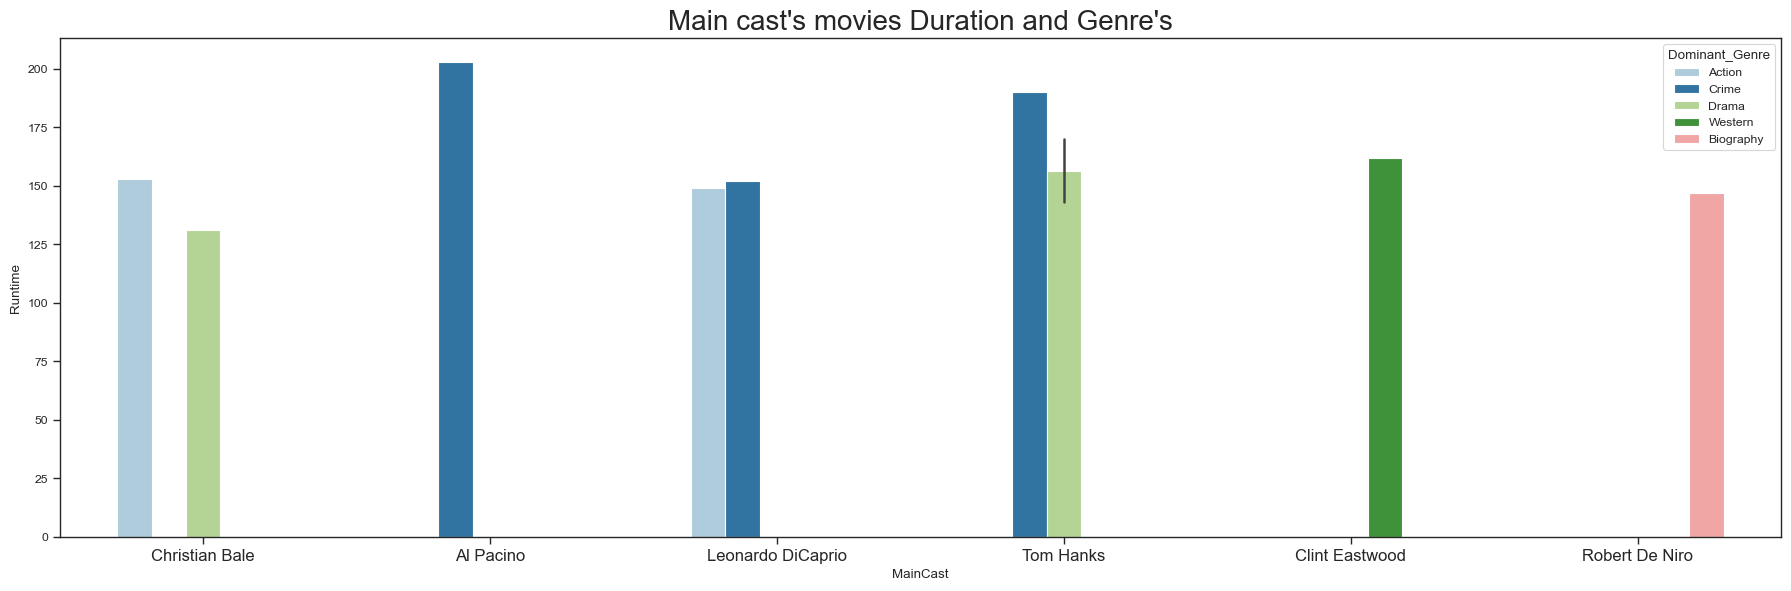

In [78]:
fig, axs = plt.subplots(figsize = (18, 6))
g = sns.barplot(x = Top_actors['MainCast'][:10], y = Top_actors['Runtime'][:10], hue = Top_actors['Dominant_Genre'][:10], legend=True, width=0.6, palette='Paired')
g.set_title("Main cast's movies Duration and Genre's", fontsize = 20)
g.tick_params(axis = 'x', labelsize = 12)
g.tick_params(axis = 'x', labelsize = 12)
plt.tight_layout()
plt.show()

***So far, we've examined how different features interact with each other. For example, we explored how Gross is related to features like the main actor (Star1), supporting actor (Star2), director, and others, identifying the key contributing factors. Now, let's move forward to the Exploratory Data Analysis (EDA), focusing on univariate, bivariate, and multivariate visualizations to further analyze the data relationships.***

----

### ***UNIVARIATE ANALYSIS***

***Distribution Analysis***

In [79]:
categorical_features = []
continous_features = []

for col in df.columns:
    if df[col].dtype=='object':
        categorical_features.append(col)
    elif df[col].dtype!='object':
        continous_features.append(col)

print("Categorical Variables :", categorical_features)
print("Continous Variables :", continous_features)

Categorical Variables : ['Title', 'Genre', 'Director', 'MainCast', 'Supportactor', 'Dominant_Genre']
Continous Variables : ['Year', 'IMDB', 'Meta', 'Votes', 'Runtime', 'Gross']


### ***Chart -1 Histogram***

In [80]:
sns.set_style("ticks")
sns.set_context('paper', font_scale=1)


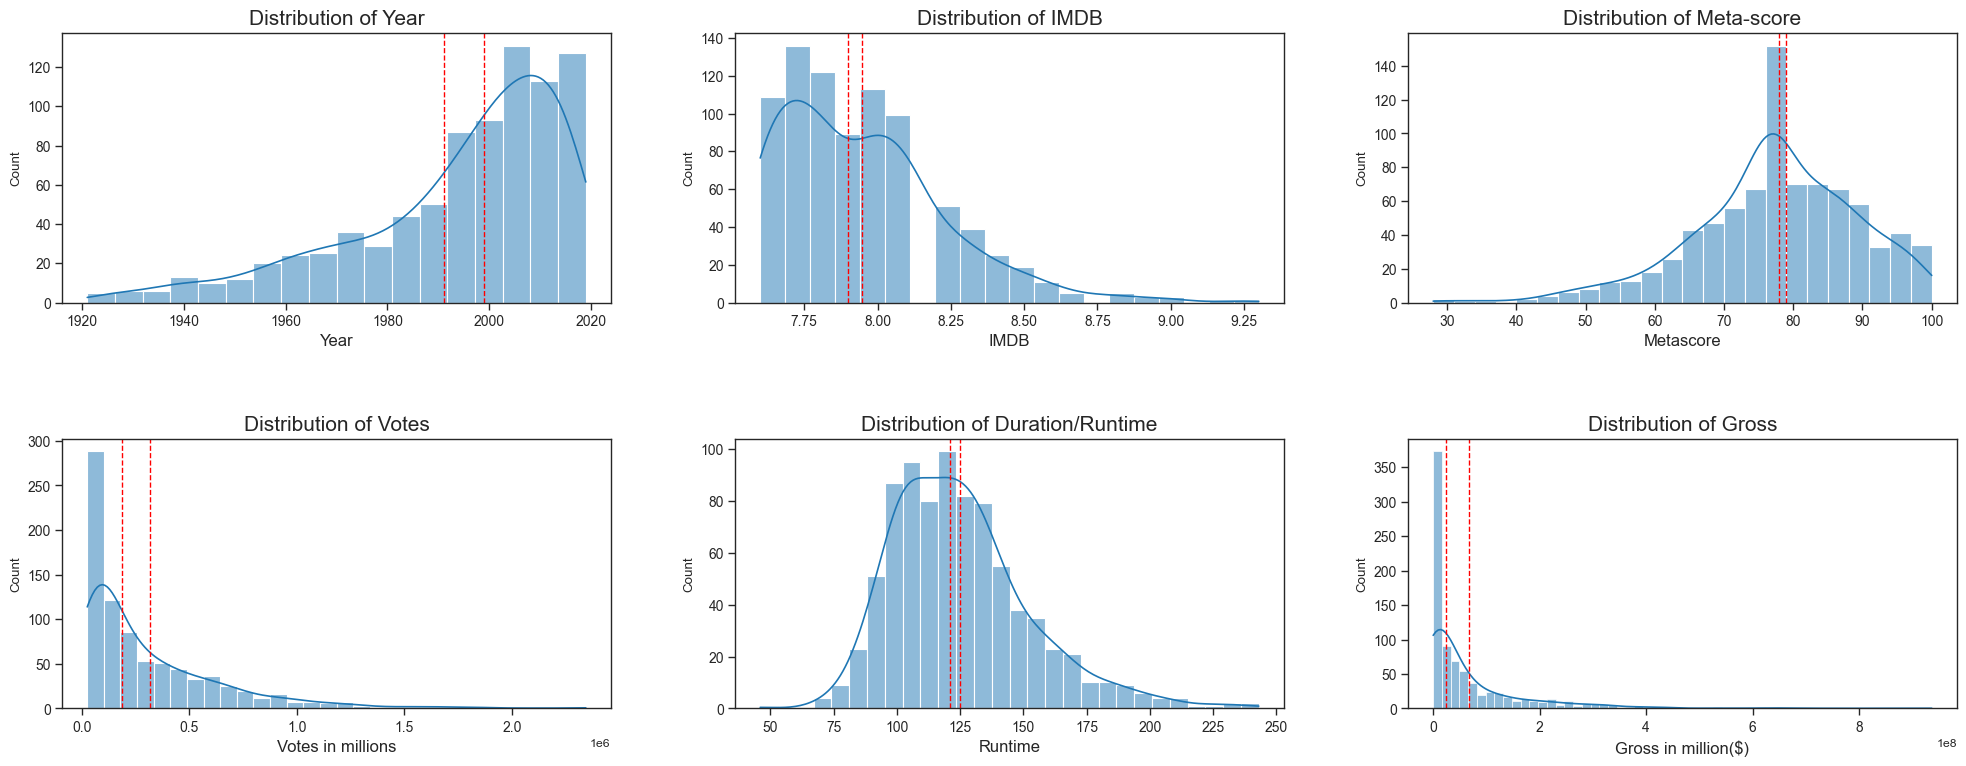

In [81]:
fig, axs = plt.subplots(2,3 , figsize =  (20, 8))

sns.histplot(x = df['Year'], ax=axs[0,0], kde=True)
axs[0,0].set_title('Distribution of Year', fontsize = 15)
axs[0,0].axvline(mean_year, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,0].axvline(median_year, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,0].set_xlabel('Year', fontsize = 12)
axs[0,0].tick_params(axis = 'x', labelsize = 10)
axs[0,0].tick_params(axis = 'y', labelsize = 10)

sns.histplot(x = df['IMDB'], ax=axs[0,1], kde=True)
axs[0,1].set_title('Distribution of IMDB', fontsize = 15)
axs[0,1].axvline(mean_imdb, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,1].axvline(median_imdb, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,1].set_xlabel('IMDB', fontsize = 12)
axs[0,1].tick_params(axis = 'x', labelsize = 10)
axs[0,1].tick_params(axis = 'y', labelsize = 10)

sns.histplot(x = df['Meta'], ax=axs[0,2], kde=True)
axs[0,2].set_title('Distribution of Meta-score', fontsize = 15)
axs[0,2].axvline(mean_metascore, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,2].axvline(median_metascore, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[0,2].set_xlabel('Metascore', fontsize = 12)
axs[0,2].tick_params(axis = 'x', labelsize = 10)
axs[0,2].tick_params(axis = 'y', labelsize = 10)

sns.histplot(x = df['Votes'], ax=axs[1,0], kde=True)
axs[1,0].set_title('Distribution of Votes', fontsize = 15)
axs[1,0].axvline(mean_votes, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,0].axvline(median_votes, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,0].set_xlabel('Votes in millions', fontsize = 12)
axs[1,0].tick_params(axis = 'x', labelsize = 10)
axs[1,0].tick_params(axis = 'y', labelsize = 10)

sns.histplot(x = df['Runtime'], ax=axs[1,1], kde=True)
axs[1,1].set_title('Distribution of Duration/Runtime', fontsize = 15)
axs[1,1].axvline(mean_runtime, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,1].axvline(median_runtime, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,1].set_xlabel('Runtime', fontsize = 12)
axs[1,1].tick_params(axis = 'x', labelsize = 10)
axs[1,1].tick_params(axis = 'y', labelsize = 10)

sns.histplot(x = df['Gross'], ax=axs[1,2], kde=True)
axs[1,2].set_title('Distribution of Gross', fontsize = 15)
axs[1,2].axvline(mean_gross, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,2].axvline(median_gross, color = 'red', linestyle = 'dashed', linewidth = 1 )
axs[1,2].set_xlabel('Gross in million($)', fontsize = 12)
axs[1,2].tick_params(axis = 'x', labelsize = 10)
axs[1,2].tick_params(axis = 'y', labelsize = 10)

plt.tight_layout(pad =2, h_pad=5, w_pad=5)
plt.show()

#### **1. Which chart or plot did you use?**

**Histograms**


#### **2. What was the reason for selecting this particular chart?**

**Histograms are ideal for understanding the distribution, central tendency (mean/median), and spread of continuous data. They also highlight skewness, outliers, and patterns effectively.**


#### **3. What insights did you gain from this analysis?**

**Year**: Movie production increased notably after 2000.

**IMDB**: Ratings cluster around 7.75–8, indicating generally high audience approval.

**Metascore**: Scores peak around 80, suggesting critical reviews are often favorable.

**Votes**: A majority of movies have fewer votes, but some outliers (blockbusters) receive significantly higher votes.

**Runtime**: Runtime distribution peaks between 100–125 minutes, which corresponds to industry standards for feature films. Outliers with extremely long runtimes (200+ minutes) are rare and likely epics or special categories.

**Gross**: The gross revenue histogram shows a positive skew (right-skewed) distribution, with the majority of movies earning far below a few blockbusters that dominate the high-end gross range.

---

### ***Chart - 2 Countplot***

In [82]:
categorical_features

['Title', 'Genre', 'Director', 'MainCast', 'Supportactor', 'Dominant_Genre']

In [83]:
df['Title'].value_counts().count(), df['Director'].value_counts().count(), df['MainCast'].value_counts().count(), df['Supportactor'].value_counts().count(), df['Dominant_Genre'].value_counts().count()

(np.int64(831), np.int64(472), np.int64(556), np.int64(704), np.int64(13))

***"Given that the categorical features have a significantly high number of unique values (e.g., Title, Director, MainCast, and Supportactor), we have opted to focus solely on Genre, which has a comparatively lower cardinality, for further analysis."***

In [84]:
sns.set_style("ticks")
sns.set_context('paper', font_scale=1)

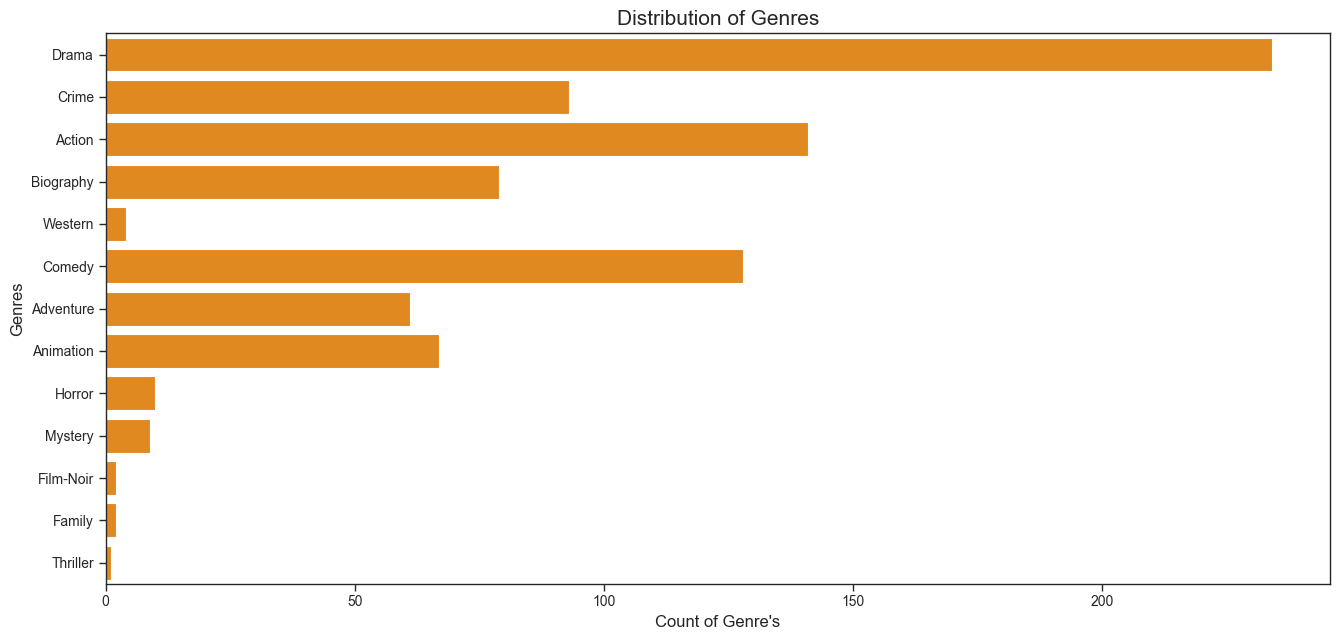

In [85]:
plt.figure(figsize=(14, 7))
sns.countplot(df['Dominant_Genre'], color='DarkOrange')
plt.title("Distribution of Genres", fontsize = 15)
plt.xlabel("Count of Genre's", fontsize = 12)
plt.ylabel("Genres", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout(pad=3, h_pad=5)
plt.show()

#### **1. What chart did you use?**

**Countplot**

#### **2. What type of visualization is used in the chart, and why was it chosen?**

Countplot is ideal for representing categorical data by displaying the frequency of each category. It was chosen because it efficiently summarizes and compares the counts of movie genres, making it easy to identify the most and least prevalent genres in the dataset. Its straightforward design ensures clear interpretation and highlights genre popularity at a glance.

#### **3. What key insights or highlights can be observed from the plot?**

* The dominance of "**Drama**" as a genre reflects its versatility and ability to resonate across diverse audiences. Genres like "Western" or "Horror," which cater to niche audiences, are less frequent.

* **Action** and **Comedy** follow, indicating their popularity as crowd-pleasing categories.

* **Western** and **Horror** genres are less frequent, showing niche appeal.

---

### ***BIVARIATE ANALYSIS***

***Relationship between two-variables***

### ***Chart - 3 Scatterplot***

***Continous Vs Continous***

In [86]:
continous_features

['Year', 'IMDB', 'Meta', 'Votes', 'Runtime', 'Gross']

In [87]:
sns.set_style("ticks")
sns.set_context('paper', font_scale=1)

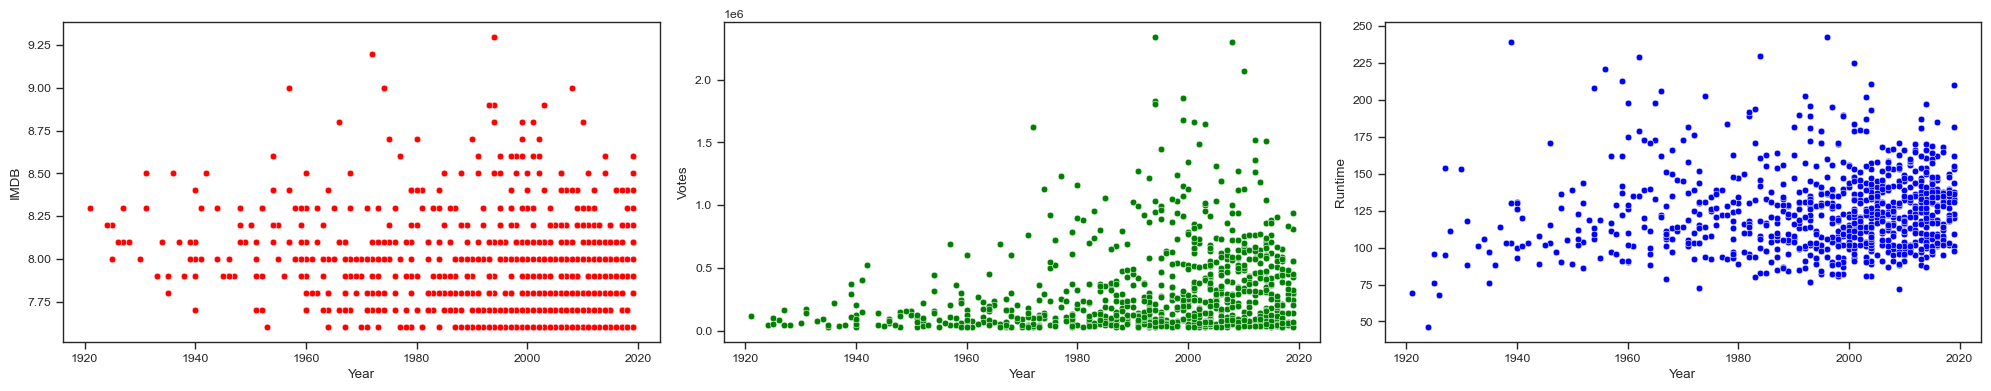

In [88]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="Year", y="IMDB", color = 'red')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="Year", y="Votes", color = 'green')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="Year", y="Runtime", color = 'blue')
plt.tight_layout()
plt.show()

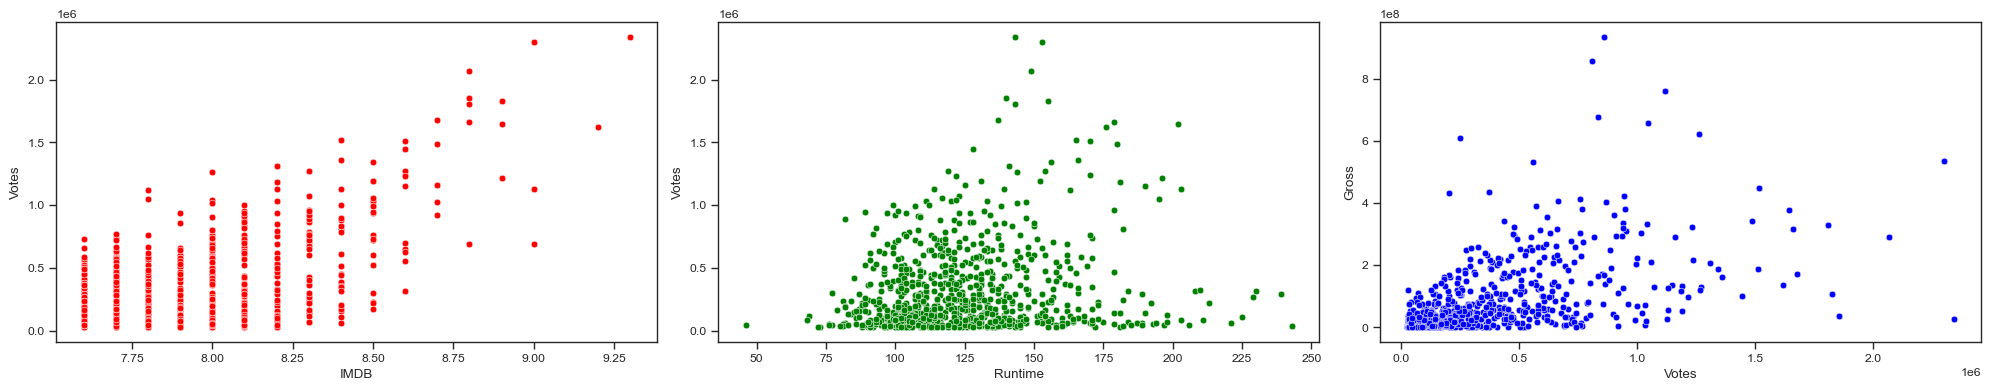

In [89]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="IMDB", y="Votes", color = 'red')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="Runtime", y="Votes", color = 'green')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="Votes", y="Gross", color = 'blue')
plt.tight_layout()
plt.show()

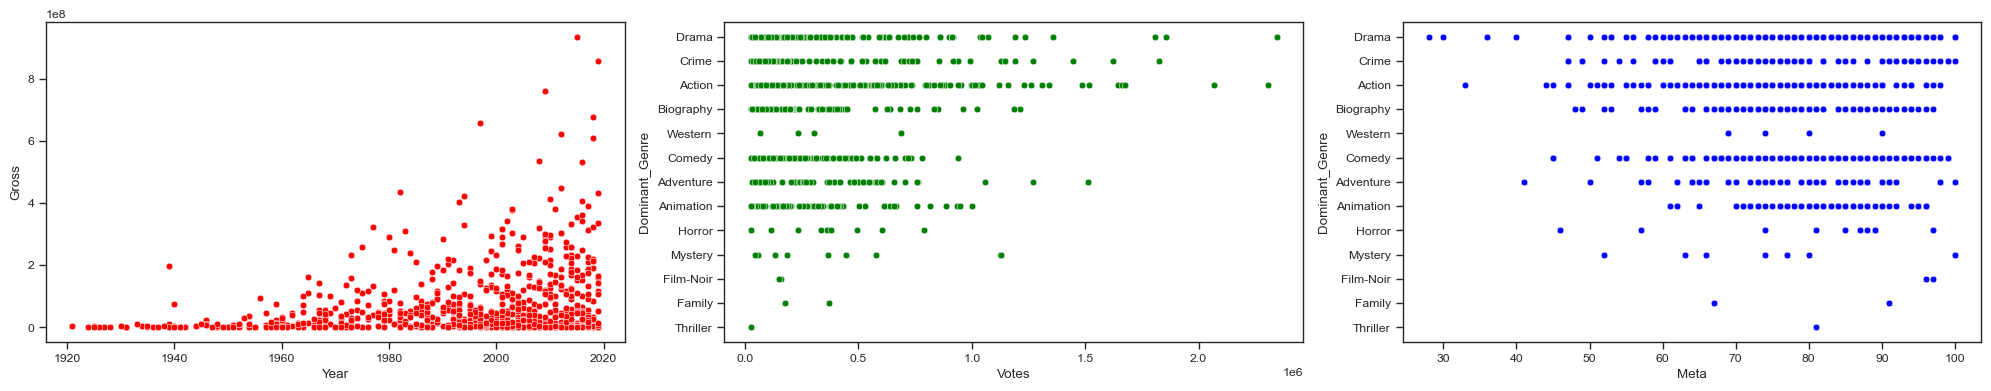

In [90]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="Year", y="Gross", color = 'red')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="Votes", y="Dominant_Genre", color = 'green' )

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="Meta", y="Dominant_Genre", color = 'blue' )
plt.tight_layout()
plt.show()

#### **1. Which chart or plot did you use?**

**Scatterplots**


#### **2. What was the reason for selecting this particular chart?**

**Scatterplots are effective for understanding the relationships and patterns between continuous variables. They help visualize correlations, outliers, and trends.**


#### **3. What insights did you gain from this analysis?**

**PLOT - 1** :

**Year vs IMDB** : Ratings are scattered across years, with no strong visible trend. Modern movies appear to have consistent IMDb scores. 

**Year vs Votes** : Votes show an increasing trend in the latter part of the century.

**Year vs Runtime** : While a few vintage movies have longer runtimes, most movies with varied runtimes are from the later decades.

**PLOT - 2** :

**IMDB vs Votes** : Higher-rated movies tend to receive more votes, suggesting popular movies have higher engagement.

**Runtime vs Votes** : No clear trend, though shorter and mid-length movies seem to get more votes.

**Votes vs Gross** : Gross revenue correlates moderately with the number of votes. Movies receiving mid-range vote counts often achieve higher gross values, indicating a broad appeal without necessarily being the most popular.

**PLOT - 3** :

**Year vs Gross** : Movies from the latter part of the century tend to achieve significantly higher box office earnings.

**Votes vs Genre** : Drama and Action genres are the most popular based on votes.

**Meta vs Genre** : Drama and Crime genres consistently receive high Metascores.

***Through scatterplot analysis, we observed that movies with higher IMDb ratings and votes reflect popularity and quality; Drama and Action stand out as audience favorites, while Drama and Crime consistently achieve critical acclaim. Additionally, commercially successful films with moderate votes emphasize mass appeal, providing a strong foundation for user-centric, high-quality recommendations.***

---

### ***Chart - 4 Barplot***

***Categorical Vs Continous***

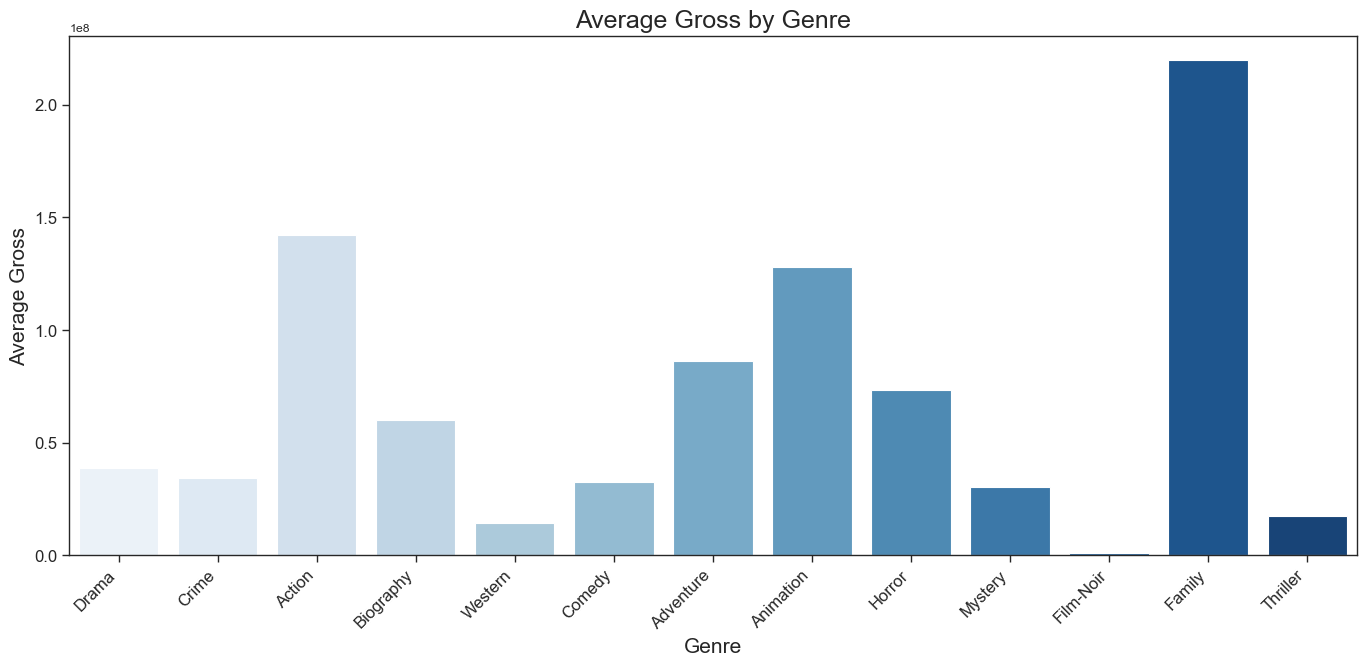

In [91]:
plt.figure(figsize = (14, 7))


sns.barplot(data=df, x='Dominant_Genre', y='Gross', estimator='mean',hue ='Dominant_Genre',  palette='Blues',errorbar=None, legend=False)

# Customizing the plot
plt.title('Average Gross by Genre', fontsize = 18)
plt.xlabel('Genre',fontsize = 15 )
plt.ylabel('Average Gross', fontsize = 15)
plt.xticks(rotation=45, ha='right', fontsize = 12) 
plt.yticks(fontsize = 12) 

plt.tight_layout(pad = 2) 
plt.show()

#### **1. What chart did you use?**

**Barplot**

#### **2. What type of visualization is used in the chart, and why was it chosen?**

A bar plot is ideal for comparing categorical data with numerical data. It effectively visualizes the relative gross performance of different genres, making it easier to identify trends.

#### **3. What key insights or highlights can be observed from the plot?**

The **Family genre** dominates in average gross revenue, showcasing its **mass appeal**.

**Animation and Action genres** also show strong performance, likely due to their **global appeal** and **large audience base**.

Genres like **Western** and **Film-Noir** underperform, suggesting limited audience interest or niche markets.

----

### ***Chart - 5 Barplot***

***Categorical Vs Categorical***

In [92]:
# Step 1: Aggregate the data
top_directors = df.groupby(['Dominant_Genre', 'Director']).size().reset_index(name='Film_Count')

# Step 2: Filter to get the most appeared director per genre
most_appeared_directors = top_directors.loc[top_directors.groupby('Dominant_Genre')['Film_Count'].idxmax()]
#most_appeared_directors

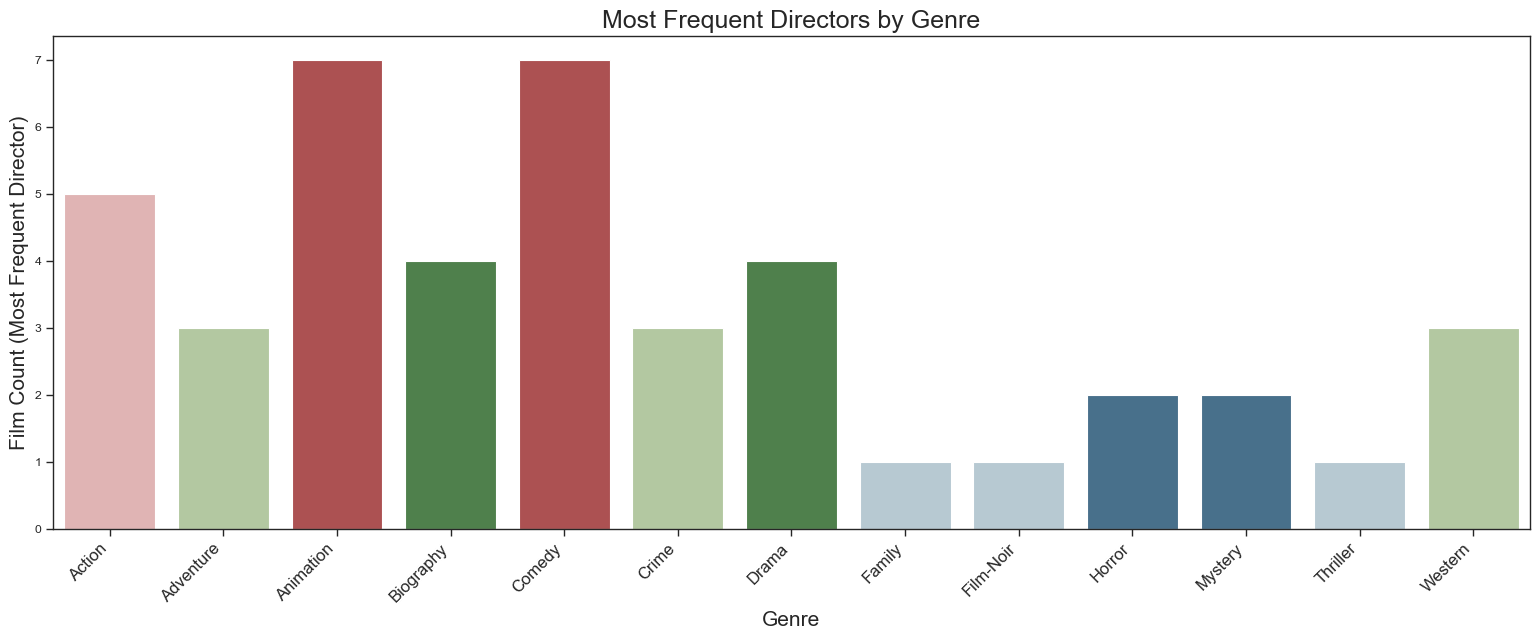

In [93]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Dominant_Genre', y='Film_Count', data=most_appeared_directors, palette = 'Paired', hue = 'Film_Count', legend=False, saturation =0.45)
plt.title("Most Frequent Directors by Genre", fontsize=18)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Film Count (Most Frequent Director)", fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout(pad=3, w_pad=5, h_pad=5)
plt.show()


***Unlike the earlier univariate plot that simply analyzed the distribution of genres, this bivariate barplot examines the relationship between genres and their associated film counts. Here, we grouped the data by directors and genres to compute the number of films per genre, providing insight into the collaboration between directors and specific genres. By focusing on this interaction, the plot highlights not just the dominance of genres like Drama and Action, but also how frequently they appear across directors’ filmographies. This approach offers a deeper understanding of genre preferences among filmmakers and their overall impact on the film industry.***

#### **1. What chart did you use?**

**Barplot**

#### **2. What type of visualization is used in the chart, and why was it chosen?**

Bar plot because it effectively compares the number of films directed by the most frequent director across different genres. It visually highlights which genres have more dominant directors, making it easier to interpret differences in film counts. The bar plot offers a clear and intuitive way to see the distribution of film counts by genre, which wouldn't be as immediately obvious in a table or other chart types.

#### **3. What key insights or highlights can be observed from the plot?**

**Animation and Comedy**: These genres have the highest number of films directed by the most frequent directors, with 7 films each.

**Action, Movies, and Drama**: These genres have moderately frequent directors, with 5 films for Action and Movies, and 4 films for Drama.

**Adventure, Crime, Western**: These genres have 3 films directed by the most frequent director, showing a steady but not overwhelming presence.

**Horror, Mystery, Thriller, Family, and Film-Noir**: These genres show much lower frequencies, with 2 or 1 films, indicating either fewer films produced or a greater variety of directors contributing to these genres.

---

### ***MULTIVARIATE ANALYSIS***

In [94]:
numeric_df = df.select_dtypes(['int', 'float'])

<Axes: >

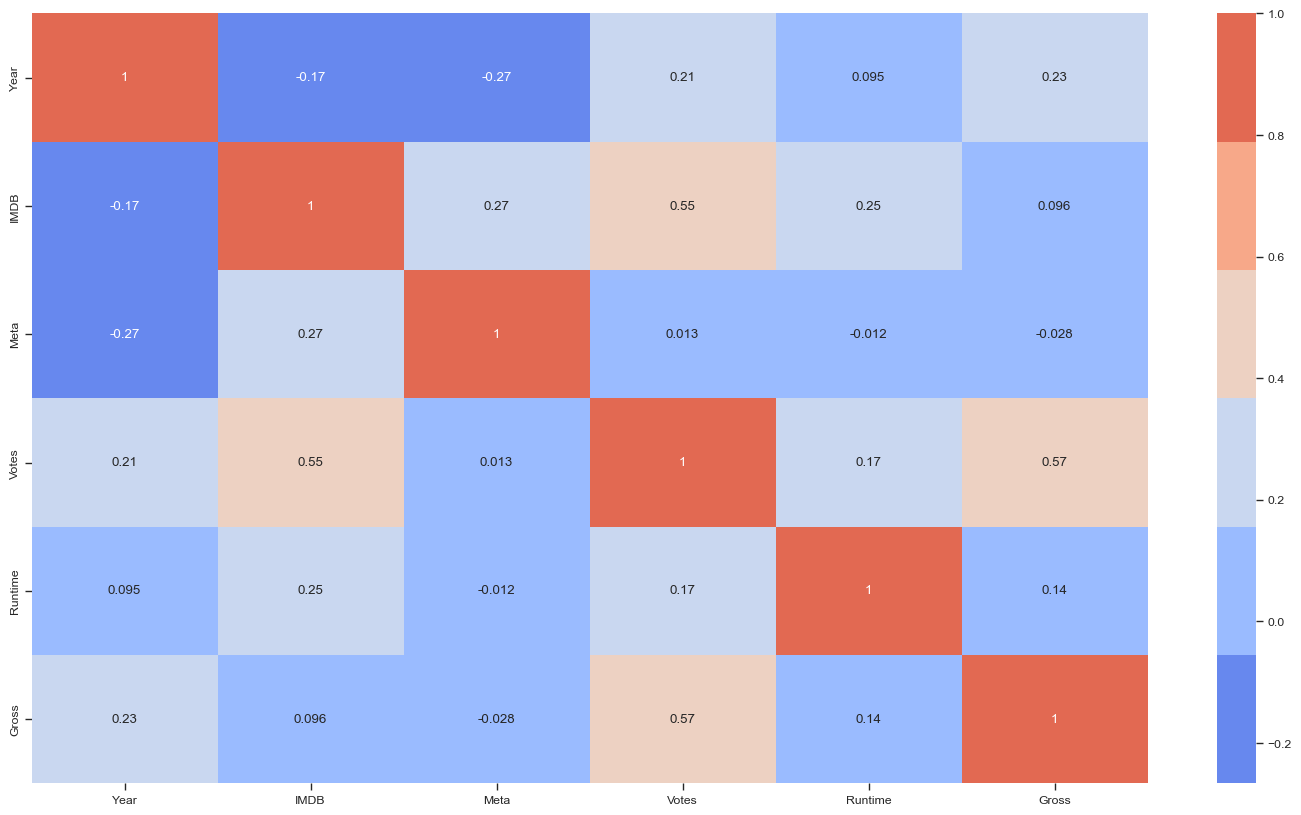

In [95]:
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap = sns.color_palette("coolwarm"))

#### **What chart did you use?**

**correlation heatmap**

#### **Why use this chart?**

A heatmap is ideal for visualizing the **correlation** between numerical variables. It helps in identifying **relationships** (positive, negative, or no correlation) quickly.

#### **What insights did you get from this chart?**

**Votes and IMDb rating**: A moderate positive correlation (0.55) indicates that movies with higher IMDb ratings tend to receive more votes, though the relationship isn't very strong.

**Gross and Votes**: A moderate positive correlation (0.57) suggests that movies earning higher gross revenues tend to get more votes. This correlation is slightly stronger than the one between IMDb ratings and votes.

**Year and Meta score**: A weak negative correlation (-0.27) implies that older movies might receive slightly different Meta scores compared to newer ones, but the relationship is not strong.

**Runtime and other features**: Runtime shows weak correlations with most variables, indicating that the length of a movie is not strongly associated with IMDb rating, Meta score, gross revenue, or votes.

---

> ### ***3. Hypothesis Testing*** 

In [96]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### 1. T-Test

#### **Is there a significant difference in the average IMDB scores between two movie genres (e.g., Action and Drama)?**

**Hypothesis:**

**Null Hypothesis (H₀)**: There is no difference in the average IMDB scores between Action and Drama movies.

**Alternative Hypothesis (H₁)**: There is a significant difference in the average IMDB scores between Action and Drama movies.

In [97]:
# Filtering the data for two genres (e.g., Action vs Drama)
action_movies = df[df['Dominant_Genre'] == 'Action']
drama_movies = df[df['Dominant_Genre'] == 'Drama']

t_statistic, p_value = stats.ttest_ind(action_movies['IMDB'], drama_movies['IMDB'])

print(f"t-test Statistic : {t_statistic:.4f}")
print(f"P value : {p_value:.4f}")

alpha = 0.05 ## Common Significance value

if p_value>alpha:
    print("Fails to Reject the Null Hypothesis : There is no significant difference in mean") ### Accept Null Hypothesis technically
else:
    print("Reject Null Hypothesis : There is significant difference between mean")

t-test Statistic : -0.0298
P value : 0.9762
Fails to Reject the Null Hypothesis : There is no significant difference in mean


**Which Statistical test have you done to obtain p-value and t-test statistic?**

*T-test*

**Why did you choose this specific statistical test?**

*A T-test is used to compare the means of two groups and determine if there is a significant difference between them. In this case, it was used to compare the mean IMDB scores between two genres of movies (e.g., Action vs Drama).*

*The result fails to reject the null hypothesis. There is no significant difference in the means of the two groups.*


### 2. ANOVA

#### **Is there a significant difference in the average IMDB scores across multiple movie genres (e.g., Action, Drama, and Comedy)?**

**Hypothesis** :

**Null Hypothesis (H₀)**: The average IMDB scores for Action, Drama, and Comedy movies are equal.

**Alternative Hypothesis (H₁)**: At least one genre has a significantly different average IMDB score.

In [98]:
# Comparison of multiple Genre's  
action = df[df['Dominant_Genre']=='Action']['IMDB']
comedy = df[df['Dominant_Genre']=='Comedy']['IMDB']
drama = df[df['Dominant_Genre']=='Drama']['IMDB']

Anova_statistic, p_value = stats.f_oneway(action, comedy, drama)
print(f"Anova Statistic : {Anova_statistic:.4f}")
print(f"P value : {p_value:.4f}")

alpha = 0.05 ## Common Significance value

if p_value>alpha:
    print("Fails to Reject the Null Hypothesis : The means of all groups are all equal") ### Accept Null Hypothesis technically
else:
    print("Reject Null Hypothesis : Atleast One group is different")

Anova Statistic : 1.4253
P value : 0.2414
Fails to Reject the Null Hypothesis : The means of all groups are all equal


**Which Statistical test have you done to obtain p-value and Anova statistic?**

*ANOVA*

**Why did you choose this specific statistical test?**

*ANOVA (Analysis of Variance) is used when comparing the means of more than two groups. In this case, it was used to test whether there is a significant difference in IMDB scores across multiple genres (e.g., Action, Drama, Comedy).*

*The result fails to reject the null hypothesis. The means of the all groups are equal.*

### 3 . Correlation(Pearson’s Correlation)

#### **What is the relationship between IMDB ratings and Gross revenue for movies? Are they positively correlated?**

**Hypothesis**:

**Null Hypothesis (H₀)**: There is no correlation between IMDB ratings and Gross revenue.

**Alternative Hypothesis (H₁)**: There is a significant correlation between IMDB ratings and Gross revenue.

In [99]:
# Pearson correlation between IMDB and Gross
correlation = df[['IMDB', 'Gross']].corr(method='pearson')
print(correlation)

           IMDB     Gross
IMDB   1.000000  0.095923
Gross  0.095923  1.000000


**Which Statistical test have you done to obtain p-value and Anova statistic?**

*Pearson Correlation*

**Why did you choose this specific statistical test?**

*Correlation is used to measure the strength and direction of a linear relationship between two continuous variables. Here, Pearson’s correlation was used to assess the relationship between IMDB scores and Gross revenue. There is a very weak positive correlation between IMDB ratings and Gross revenue.*

---

> ### ***4. Feature Engineering*** 

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [101]:
data = df.copy()

In [102]:
data = pd.merge(data, raw_data[['Series_Title', 'Overview']],left_on='Title', right_on='Series_Title', how='left')

In [103]:
data.head()

,Year,Title,IMDB,Meta,Votes,Genre,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre,Series_Title,Overview
0,1994,The Shawshank Redemption,9.3,80,2343110,Drama,143,28341469,Frank Darabont,Tim Robbins,Morgan Freeman,Drama,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,1972,The Godfather,9.2,100,1620367,"Crime, Drama",176,134966411,Francis Ford Coppola,Marlon Brando,Al Pacino,Crime,The Godfather,An organized crime dynasty's aging patriarch t...
2,2008,The Dark Knight,9.0,84,2303232,"Action, Crime, Drama",153,534858444,Christopher Nolan,Christian Bale,Heath Ledger,Action,The Dark Knight,When the menace known as the Joker wreaks havo...
3,1974,The Godfather: Part II,9.0,90,1129952,"Crime, Drama",203,57300000,Francis Ford Coppola,Al Pacino,Robert De Niro,Crime,The Godfather: Part II,The early life and career of Vito Corleone in ...
4,1957,12 Angry Men,9.0,96,689845,"Crime, Drama",97,4360000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Crime,12 Angry Men,A jury holdout attempts to prevent a miscarria...


In [104]:
data = data.drop(columns = ['Series_Title','Genre'])

In [105]:
encoded_genre = {'Drama':0, 'Crime':1, 'Action':2, 'Biography':3, 'Western':4, 'Comedy':5,
       'Adventure':6, 'Animation':7, 'Horror':8, 'Mystery':9, 'Film-Noir':10,
       'Family':11, 'Thriller':12}
data['Dominant_Genre'] = data['Dominant_Genre'].map(encoded_genre)

In [106]:
data.head()

,Year,Title,IMDB,Meta,Votes,Runtime,Gross,Director,MainCast,Supportactor,Dominant_Genre,Overview
0,1994,The Shawshank Redemption,9.3,80,2343110,143,28341469,Frank Darabont,Tim Robbins,Morgan Freeman,0,Two imprisoned men bond over a number of years...
1,1972,The Godfather,9.2,100,1620367,176,134966411,Francis Ford Coppola,Marlon Brando,Al Pacino,1,An organized crime dynasty's aging patriarch t...
2,2008,The Dark Knight,9.0,84,2303232,153,534858444,Christopher Nolan,Christian Bale,Heath Ledger,2,When the menace known as the Joker wreaks havo...
3,1974,The Godfather: Part II,9.0,90,1129952,203,57300000,Francis Ford Coppola,Al Pacino,Robert De Niro,1,The early life and career of Vito Corleone in ...
4,1957,12 Angry Men,9.0,96,689845,97,4360000,Sidney Lumet,Henry Fonda,Lee J. Cobb,1,A jury holdout attempts to prevent a miscarria...


In [107]:
numeric_features = data[['IMDB', 'Gross', 'Meta']]
scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(numeric_features)

In [108]:
tf = TfidfVectorizer(stop_words='english',max_features=3000)
text_matrix = tf.fit_transform(data['Overview'])

In [109]:
text_matrix.shape

(832, 3000)

In [110]:
scaled_numeric.shape

(832, 3)

In [111]:
combined_matrix = hstack([text_matrix,scaled_numeric, data[['Dominant_Genre']]])

In [112]:
indices = pd.Series(data.index, index = data['Title'])

In [113]:
cosine_text_similarity = cosine_similarity(text_matrix)
cosine_combined_similarity = cosine_similarity(combined_matrix)
linear_text_similarity = linear_kernel(text_matrix)
linear_combined_similarity = linear_kernel(combined_matrix)

> ### ***5. Model Implementation*** 

### ***Cosine similarity with Overview***

#### ***What is Cosine Similarity*** ?

***Cosine Similarity*** *is a metric used to measure how similar ***two vectors*** are in a ***multi-dimensional space***. It computes the ***cosine*** of the angle between two vectors, where a value of ***1 indicates identical vectors, 0 indicates orthogonality (no similarity), and -1 indicates opposite directions***. It is widely used in ***text mining*** and ***recommendation systems*** to measure the similarity between items based on their features, in this case, based on the overview of movies.*

In [114]:
def get_recommendations(title, cosine_text_similarity=cosine_text_similarity):
    idx = indices[title]
    cosine_text_score = list(enumerate(cosine_text_similarity[idx]))
    
    # Sort by score in descending order
    cosine_text_score = sorted(cosine_text_score, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 recommendations (excluding the selected movie itself)
    cosine_text_score = cosine_text_score[1:11]
    
    # Extract movie indices and scores
    movie_indices = [i[0] for i in cosine_text_score]
    cosine_scores = [i[1] for i in cosine_text_score]  

    # Create a DataFrame for the recommendations
    recommendations_df = pd.DataFrame({
        'Movie Title': data['Title'].iloc[movie_indices].values,
        'Scores': cosine_scores
    })
    
    return recommendations_df

In [115]:
get_recommendations('The Dark Knight')

,Movie Title,Scores
0,The Dark Knight Rises,0.249875
1,Batman Begins,0.233725
2,Kill Bill: Vol. 1,0.116997
3,Joker,0.114312
4,La battaglia di Algeri,0.113445
5,Jaws,0.112924
6,The Hurricane,0.104782
7,Wreck-It Ralph,0.100881
8,Mulan,0.095513
9,When Harry Met Sally...,0.089572


##### ***Observation***:

* *The recommendations are mostly related to Batman and Joker movies (The Dark Knight Rises, Batman Begins), which makes sense since these movies share similar themes and plot elements.*

* *The lower scores for movies like Mulan and Wreck-It Ralph suggest these have less thematic similarity based on the overview, showing the model's ability to differentiate based on content.*

---

### ***Cosine Similarity of Overview with Numerical features***

In [116]:
def get_recommendations(title, cosine_combined_similarity=cosine_combined_similarity):
    idx = indices[title]
    cosine_combined_score = list(enumerate(cosine_combined_similarity[idx]))
    
    # Sort by score in descending order
    cosine_combined_score = sorted(cosine_combined_score, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 recommendations (excluding the selected movie itself)
    cosine_combined_score = cosine_combined_score[1:11]
    
    # Extract movie indices and  scores
    movie_indices = [i[0] for i in cosine_combined_score]
    cosine_scores = [i[1] for i in cosine_combined_score]  
    
    # Create a DataFrame for the recommendations
    recommendations_df = pd.DataFrame({
        'Movie Title': data['Title'].iloc[movie_indices].values,
        'Scores': cosine_scores
    })
    
    return recommendations_df

In [117]:
get_recommendations('The Dark Knight')

,Movie Title,Scores
0,The Dark Knight Rises,0.870478
1,Schindler's List,0.851392
2,Batman Begins,0.845540
3,The Lord of the Rings: The Return of the King,0.844598
4,"Il buono, il brutto, il cattivo",0.842910
5,Goodfellas,0.841879
6,The Lord of the Rings: The Fellowship of the Ring,0.840165
7,The Lord of the Rings: The Two Towers,0.838685
8,Gisaengchung,0.838539
9,Star Wars,0.835488


##### ***Observation***:

*The top recommendations here show that including numeric features like IMDb rating, gross earnings, and genre encoding has improved the relevance of the recommendations.*

*Movies like Schindler's List, Goodfellas, and The Lord of the Rings now appear as relevant recommendations. These movies not only have thematic similarity but also match in terms of popularity (higher IMDb ratings, box office success).*

*The Dark Knight Rises remains highly ranked, which shows that adding the numeric features hasn’t overshadowed the content-based recommendation system—it complements it.*

----

### ***Linear Kernel with Overview***

#### ***What is a Linear Kernel***?

*A ***linear kernel*** is a function used in machine learning algorithms (like ***Support Vector Machines*** or ***Linear Regression***) to calculate the similarity between data points by measuring the ***dot product of feature vectors***. In the case of recommendation systems, we are using the linear kernel to measure the similarity between movies based on feature vectors, where a higher dot product implies higher similarity.*

In [118]:
def recommendations(title, linear_text_similarity=linear_text_similarity):
    idx = indices[title]
    linear_text_score = list(enumerate(linear_text_similarity[idx]))
    
    # Sort by score in descending order
    linear_text_score = sorted(linear_text_score, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 recommendations (excluding the selected movie itself)
    linear_text_score = linear_text_score[1:11]
    
    # Extract movie indices and scores
    movie_indices = [i[0] for i in linear_text_score]
    linear_scores = [i[1] for i in linear_text_score]  

    # Create a DataFrame for the recommendations
    recommendations_df = pd.DataFrame({
        'Movie Title': data['Title'].iloc[movie_indices].values,
        'Scores': linear_scores
    })
    
    return recommendations_df

In [119]:
recommendations('The Dark Knight')

,Movie Title,Scores
0,The Dark Knight Rises,0.249875
1,Batman Begins,0.233725
2,Kill Bill: Vol. 1,0.116997
3,Joker,0.114312
4,La battaglia di Algeri,0.113445
5,Jaws,0.112924
6,The Hurricane,0.104782
7,Wreck-It Ralph,0.100881
8,Mulan,0.095513
9,When Harry Met Sally...,0.089572


##### ***Observation***:

* *The recommendations are very similar to the Cosine Similarity with Overview Only results. This indicates that the linear kernel model, in this case, is producing very similar results as the cosine similarity when only considering the overview of movies.*

* *As expected, linear kernel with overview only isn't as effective since it doesn't incorporate the extra information from numeric features.*

---

In [ ]:
def recommendations(title, linear_combined_similarity=linear_combined_similarity):
    idx = indices[title]
    linear_combined_score = list(enumerate(linear_combined_similarity[idx]))
    
    # Sort by score in descending order
    linear_combined_score = sorted(linear_combined_score, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 recommendations (excluding the selected movie itself)
    linear_combined_score = linear_combined_score[1:11]
    
    # Extract movie indices and scores
    movie_indices = [i[0] for i in linear_combined_score]
    linear_scores = [i[1] for i in linear_combined_score]  

    # Create a DataFrame for the recommendations
    recommendations_df = pd.DataFrame({
        'Movie Title': data['Title'].iloc[movie_indices].values,
        'Scores': linear_scores
    })
    
    return recommendations_df 

In [ ]:
recommendations('The Dark Knight')

,Movie Title,Scores
0,E.T. the Extra-Terrestrial,23.042701
1,Willy Wonka & the Chocolate Factory,22.520620
2,The Third Man,20.987858
3,The Maltese Falcon,20.929624
4,Rear Window,19.187733
5,Vertigo,19.118828
6,Memento,18.964844
7,Kahaani,18.772166
8,Shutter Island,18.746785
9,Sleuth,18.725580


#### ***Observation***:

* *The results for Linear Kernel with Overview + Combined Features show much higher similarity scores than the previous methods, which indicates that combining numeric features with the overview improves the recommendation relevance.*

* *Movies like E.T. the Extra-Terrestrial, Willy Wonka, and The Third Man are far more diverse, suggesting that the numeric features such as genre encoding, ratings, and earnings contribute to a better understanding of what other movies share in terms of success and audience interest.*

* *This supports the idea that combining both content (overview) and numeric data improves recommendations.*

---

> ### ***6. Conclusion*** 

### ***Insights from EDA***

***Trends and Patterns***:

* Movie production has notably increased since 2000, with drama being the most dominant genre across decades.
* IMDb ratings and Metascores highlight consistent critical and audience approval for movies in the 7.5–8.5 range.

***Genre Popularity***:

* Drama and Action genres dominate in both audience appeal and critical acclaim.
* Family and Animation genres exhibit high gross revenues, showcasing their global mass appeal.

***Contributors’ Impact***:

* Directors like Steven Spielberg and actors such as Tom Hanks significantly shape cinematic trends, reflecting their consistent prominence in top-performing films.

***Viewer Engagement***:

* Movies with higher votes tend to garner greater revenue, indicating a link between audience engagement and financial success.
* Shorter runtimes (100–125 minutes) are more common and align with viewer preferences.

***Commercial Success Indicators***:

* High revenue correlates with Action, Animation, and Family genres, while niche genres like Western and Film-Noir underperform.

***In summary, Cosine Similarity with just the overview is effective when focusing on content-based recommendations, particularly when you want to compare movies based purely on their descriptions. On the other hand, the Linear Kernel with combined features can be more robust, as it integrates both content and numeric context, but it may be less sensitive to the subtle content-based relationships that cosine similarity highlights.***

### ***Winner Prediction:***

* ***Cosine Similarity with Overview + Combined Features seems to perform the best in terms of generating highly relevant recommendations that make sense in both content and success metrics (IMDb, gross earnings, genre).***

* ***Linear Kernel with Combined Features also gives us diverse, high-scoring recommendations, but the results are less intuitive compared to cosine similarity.***

* ***Linear Kernel with Overview Only is much less effective since it doesn’t use numeric features.***

---

In [122]:
# Ground truth: Movies relevant to specific input movies
ground_truth = {
    "The Dark Knight Rises": ["Batman Begins", "Joker", "The Dark Knight"],
    "Jaws": ["The Hurricane", "Mulan", "When Harry Met Sally..."],
    # Add more test cases
}


In [123]:
def precision_recall_at_k(recommendations, ground_truth, k=10):
    precision_scores = []
    recall_scores = []
    
    for title, relevant_movies in ground_truth.items():
        if title not in recommendations:
            continue
        
        # Get top K recommendations
        recommended_movies = recommendations[title]['Movie Title'][:k]
        
        # Calculate intersection of recommended and relevant movies
        relevant_set = set(relevant_movies)
        recommended_set = set(recommended_movies)
        intersection = relevant_set.intersection(recommended_set)
        
        # Precision@K
        precision = len(intersection) / k
        precision_scores.append(precision)
        
        # Recall@K
        recall = len(intersection) / len(relevant_set)
        recall_scores.append(recall)
    
    # Return average scores
    return np.mean(precision_scores), np.mean(recall_scores)

# Example usage
recommendations = {
    "The Dark Knight Rises": recommendations("The Dark Knight Rises"),
    "Jaws": recommendations("Jaws"),
}
precision, recall = precision_recall_at_k(recommendations, ground_truth)
print(f"Precision@K: {precision}, Recall@K: {recall}")


Precision@K: 0.0, Recall@K: 0.0
